<center>

<font size= "8"> Portfolio Management</font>

<center>

# Introduction

This project aims to study the construction of a portfolio composed of five stocks Reliance, Tata consultancy services, HDFC bank, ICICI bank, Infosys and the NIfty 50 stock index, all listed on the National Stock Exchange (NSE India). This study aims to minimize the risk associated with this portfolio by using portfolio management techniques.

The importance of portfolio management lies in finding a balance between expected return and risk. Volatility, which measures the dispersion of an asset's returns, is often used to measure risk. On the other hand, expected return represents the average expected return on an asset. Analyzing the relationship between volatility and expected return will improve our Performance.

In this context, we will examine different portfolio compositions, adjusting the investment proportions in each asset. The objective is to find the optimal combination that minimises the portfolio's overall risk while maximising the expected return. We will use concepts such as covariance and the correlation coefficient between asset returns to do this. Particular attention will be paid to the effect of correlations between asset returns on the portfolio's risk level. The correlation coefficient reflects the extent to which asset returns move together. We will study how the correlation between the selected stocks and NIFTY50 index can influence the portfolio's overall risk.

To conduct this study, we will use the Python programming language and Jupyter Notebook in particular, which offers a range of tools and libraries for financial analysis and portfolio management. Using Python, we can perform volatility, covariance, and portfolio optimisation calculations to find the optimal composition that minimises risk.

In conclusion, this project will allow us to explore the fundamental concepts of portfolio management by studying the construction of a portfolio composed of Five stocks and a stock index. We will minimise risk using quantitative analysis and optimisation techniques while maximising expected return. Analysing the effect of correlations between asset returns will allow us to understand better the impact of diversification on the portfolio's risk level.

### Import libraries and data

In this notebook we will work on a new package [yfinance 0.2.3](https://pypi.org/project/yfinance/), which contains the major stock markets data from [Yahoo! Finance](https://finance.yahoo.com).

We need to import of the basic library to be able to analyze the data:

In [76]:
#Imports
import os
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
from scipy import stats
import pandas.testing as tm



import math
import seaborn as sns
import datetime as dt
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
from pylab import rcParams
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42 # I'm seeding with 42, if you try the same you will get the same results.
np.random.seed(RANDOM_SEED)


First of all if you don't have the yahoofinance libraries, you can install them via pip.

In [77]:
!pip install yfinance
!pip install yahoofinancials

> In this project, we have chosen four stocks (Reliance, Tata consultancy services, HDFC bank, ICICI bank, Infosys) listed on the NSE India and the NIfty 50 stock index

You can import any stock from the ``yfinance`` library and choose the period and name as a ticker.

In [78]:
import pandas as pd
from yahoofinancials import YahooFinancials
import yfinance as yf
RIL = yf.download("RELIANCE.NS", start="2012-05-18", end="2024-01-01",group_by="ticker") # Stock of Reliance
TCS = yf.download("TCS.NS", start="2012-05-18", end="2024-01-01",group_by="ticker") # Stock of Tata Consultancy Services
HDFCBK = yf.download("HDFCBANK.NS", start="2012-05-18", end="2024-01-01",group_by="ticker") # Stock of HDFC bank
ICICIBK = yf.download("ICICIBANK.NS", start="2012-05-18", end="2024-01-01",group_by="ticker") # Stock of ICICI bank
INFY = yf.download("INFY.NS", start="2012-05-18", end="2024-01-01",group_by="ticker") # Stock of Infosys
NIFTY = yf.download("^NSEI", start="2012-05-18", end="2024-01-01",group_by="ticker") # Stock of Nifty 50
print(RIL.shape, TCS.shape, HDFCBK.shape, ICICIBK.shape,INFY.shape,NIFTY.shape)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(2865, 6) (2865, 6) (2865, 6) (2865, 6) (2865, 6) (2850, 6)


The stock size is 2673 observations and 6 variables. Visualize the head and tail for each stock:

In [79]:
RIL

Open         High          Low        Close    Adj Close  \
Date                                                                          
2012-05-18   309.455902   318.370636   308.587280   314.781891   286.671997   
2012-05-21   313.844696   320.336456   313.616119   317.959198   289.565613   
2012-05-22   322.119415   322.119415   314.873322   315.947662   287.733673   
2012-05-23   313.250397   315.421936   310.667389   314.004700   285.964233   
2012-05-24   317.273438   320.016449   313.661835   317.867767   289.482361   
...                 ...          ...          ...          ...          ...   
2023-12-22  2559.600098  2580.899902  2547.649902  2565.050049  2565.050049   
2023-12-26  2568.000000  2591.949951  2562.699951  2578.050049  2578.050049   
2023-12-27  2582.000000  2599.899902  2573.100098  2586.850098  2586.850098   
2023-12-28  2589.800049  2612.000000  2586.850098  2605.550049  2605.550049   
2023-12-29  2611.100098  2614.000000  2579.300049  2584.949951  2584.949951   

             Volume  
Date                 
2012-05-18  5170896  
2012-05-21  5105640  
2012-05-22  6426647  
2012-05-23  5650783  
2012-05-24  5249332  
...             ...  
2023-12-22  8270892  
2023-12-26  3732832  
2023-12-27  4602078  
2023-12-28  6151318  
2023-12-29  5432292  

[2865 rows x 6 columns]

In [80]:
TCS

Open         High          Low        Close    Adj Close  \
Date                                                                          
2012-05-18   602.400024   612.450012   601.325012   605.325012   473.361237   
2012-05-21   605.500000   612.500000   602.025024   604.599976   472.794128   
2012-05-22   610.500000   620.000000   606.500000   612.025024   478.600586   
2012-05-23   616.500000   617.775024   607.049988   612.575012   479.030670   
2012-05-24   612.500000   614.474976   603.549988   610.724976   477.583954   
...                 ...          ...          ...          ...          ...   
2023-12-22  3800.000000  3845.949951  3762.000000  3824.000000  3770.140381   
2023-12-26  3819.850098  3834.000000  3790.149902  3795.550049  3742.091064   
2023-12-27  3799.000000  3818.199951  3768.000000  3811.199951  3757.520508   
2023-12-28  3824.000000  3838.000000  3792.100098  3799.899902  3746.379639   
2023-12-29  3792.000000  3822.600098  3765.399902  3793.399902  3739.971191   

             Volume  
Date                 
2012-05-18  2656670  
2012-05-21  2227088  
2012-05-22  2360916  
2012-05-23  2162806  
2012-05-24  1205674  
...             ...  
2023-12-22  2413058  
2023-12-26  1285231  
2023-12-27  1293976  
2023-12-28  1682889  
2023-12-29  1574996  

[2865 rows x 6 columns]

In [81]:
HDFCBK

Open         High          Low        Close    Adj Close  \
Date                                                                          
2012-05-18   244.899994   251.949997   244.500000   250.274994   225.888275   
2012-05-21   250.125000   253.925003   246.975006   248.725006   224.489334   
2012-05-22   251.899994   252.500000   243.475006   244.625000   220.788803   
2012-05-23   245.000000   246.449997   241.100006   243.600006   219.863708   
2012-05-24   246.500000   251.350006   242.500000   249.850006   225.504700   
...                 ...          ...          ...          ...          ...   
2023-12-22  1683.599976  1685.900024  1667.099976  1670.849976  1648.341187   
2023-12-26  1673.250000  1685.949951  1668.550049  1682.449951  1659.784912   
2023-12-27  1681.500000  1706.500000  1678.599976  1703.300049  1680.354126   
2023-12-28  1709.300049  1721.400024  1702.000000  1705.250000  1682.277710   
2023-12-29  1697.000000  1714.900024  1696.000000  1709.250000  1686.223877   

              Volume  
Date                  
2012-05-18   4807208  
2012-05-21   4271170  
2012-05-22   5548406  
2012-05-23   6347944  
2012-05-24   5769622  
...              ...  
2023-12-22  24289425  
2023-12-26   9022928  
2023-12-27  13504539  
2023-12-28  22038235  
2023-12-29  12505713  

[2865 rows x 6 columns]

In [82]:
ICICIBK

Open         High         Low        Close    Adj Close  \
Date                                                                         
2012-05-18   140.027283   147.272720  139.699997   146.399994   125.473450   
2012-05-21   144.927277   148.872726  144.927277   147.472733   126.392853   
2012-05-22   149.100006   149.972733  145.163635   145.600006   124.787804   
2012-05-23   144.181824   146.336365  143.672729   144.236359   123.619080   
2012-05-24   145.636368   150.181824  143.963638   149.199997   127.873215   
...                 ...          ...         ...          ...          ...   
2023-12-22  1002.950012  1009.549988  991.599976   994.299988   994.299988   
2023-12-26   994.900024   997.500000  989.900024   995.099976   995.099976   
2023-12-27   997.950012  1004.900024  992.000000  1002.250000  1002.250000   
2023-12-28  1008.000000  1011.700012  999.099976  1005.900024  1005.900024   
2023-12-29  1004.049988  1008.549988  993.700012   996.599976   996.599976   

              Volume  
Date                  
2012-05-18  24381560  
2012-05-21  17162794  
2012-05-22  22998915  
2012-05-23  14613428  
2012-05-24  16923032  
...              ...  
2023-12-22  20881976  
2023-12-26  14339699  
2023-12-27  12996468  
2023-12-28  24915990  
2023-12-29  12280140  

[2865 rows x 6 columns]

In [83]:
INFY

Open         High          Low        Close    Adj Close  \
Date                                                                          
2012-05-18   290.668762   300.625000   287.768738   297.856262   224.397873   
2012-05-21   298.112488   298.187500   290.500000   292.556244   220.404968   
2012-05-22   294.375000   296.006256   290.456238   292.637512   220.466217   
2012-05-23   294.375000   295.600006   288.399994   293.524994   221.134811   
2012-05-24   293.625000   298.612488   289.125000   297.600006   225.163742   
...                 ...          ...          ...          ...          ...   
2023-12-22  1534.949951  1566.000000  1523.000000  1562.900024  1554.140869   
2023-12-26  1535.000000  1548.000000  1523.000000  1543.949951  1535.297119   
2023-12-27  1544.000000  1570.000000  1544.000000  1567.099976  1558.317383   
2023-12-28  1568.949951  1568.949951  1555.000000  1562.650024  1553.892334   
2023-12-29  1541.050049  1559.449951  1540.000000  1542.900024  1534.253052   

             Volume  
Date                 
2012-05-18  5938160  
2012-05-21  4776760  
2012-05-22  5823208  
2012-05-23  5402032  
2012-05-24  7612048  
...             ...  
2023-12-22  6741060  
2023-12-26  6878067  
2023-12-27  4225849  
2023-12-28  5702253  
2023-12-29  4388990  

[2865 rows x 6 columns]

In [84]:
NIFTY

Open          High           Low         Close  \
Date                                                                 
2012-05-18   4796.399902   4908.500000   4788.950195   4891.450195   
2012-05-22   4954.700195   4956.350098   4849.899902   4860.500000   
2012-05-23   4843.000000   4853.750000   4803.950195   4835.649902   
2012-05-24   4863.399902   4931.899902   4830.149902   4921.399902   
2012-05-25   4905.950195   4935.799805   4889.350098   4920.399902   
...                  ...           ...           ...           ...   
2023-12-22  21295.849609  21390.500000  21232.449219  21349.400391   
2023-12-26  21365.199219  21477.150391  21329.449219  21441.349609   
2023-12-27  21497.650391  21675.750000  21495.800781  21654.750000   
2023-12-28  21715.000000  21801.449219  21678.000000  21778.699219   
2023-12-29  21737.650391  21770.300781  21676.900391  21731.400391   

               Adj Close  Volume  
Date                              
2012-05-18   4891.450195       0  
2012-05-22   4860.500000       0  
2012-05-23   4835.649902       0  
2012-05-24   4921.399902       0  
2012-05-25   4920.399902       0  
...                  ...     ...  
2023-12-22  21349.400391  284700  
2023-12-26  21441.349609  219500  
2023-12-27  21654.750000  256500  
2023-12-28  21778.699219  393100  
2023-12-29  21731.400391  270900  

[2850 rows x 6 columns]

# Exploratory Data Analysis (EDA)


Exploratory Data Analysis (EDA) for stocks like Reliance, TCS, HDFC bank, ICICI bank, and the NIFTY50 involves examining their historical price and volume data. Through visualizations, statistical measures, and studying relationships, EDA helps identify trends, patterns, and interdependencies among these stocks. It provides insights into their behaviour, distribution of returns, and market dependencies, assisting in decision-making and further analysis.

## Data Analysis

We start with the descriptive statistics of the variables; Open, High, Low, Close, Adj Close, and Volume for each company of GAFAM:

In [85]:
RIL.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [86]:
TCS.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [87]:
HDFCBK.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [88]:
ICICIBK.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [89]:
INFY.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [90]:
NIFTY.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

> The presence of no missing values in each stock dataset is a positive finding, indicating that we have complete and reliable data for analysis. This allows for accurate assessments of various aspects of the stocks, simplifies data preparation, and ensures more robust and trustworthy studies.

In [91]:
#Combining dataframes
dataset = pd.concat([RIL.Close, TCS.Close, HDFCBK.Close, ICICIBK.Close, INFY.Close,NIFTY.Close],axis=1)
# Change the column names
dataset.columns =['RIL', 'TCS', 'HDFCBK','ICICIBK','INFY','NIFTY']
dataset.head()

RIL         TCS      HDFCBK     ICICIBK        INFY  \
Date                                                                     
2012-05-18  314.781891  605.325012  250.274994  146.399994  297.856262   
2012-05-21  317.959198  604.599976  248.725006  147.472733  292.556244   
2012-05-22  315.947662  612.025024  244.625000  145.600006  292.637512   
2012-05-23  314.004700  612.575012  243.600006  144.236359  293.524994   
2012-05-24  317.867767  610.724976  249.850006  149.199997  297.600006   

                  NIFTY  
Date                     
2012-05-18  4891.450195  
2012-05-21          NaN  
2012-05-22  4860.500000  
2012-05-23  4835.649902  
2012-05-24  4921.399902

In [92]:
print('Shape of data',dataset.shape)

Shape of data (2865, 6)


We have 2865 observations (day) and 6 variables.

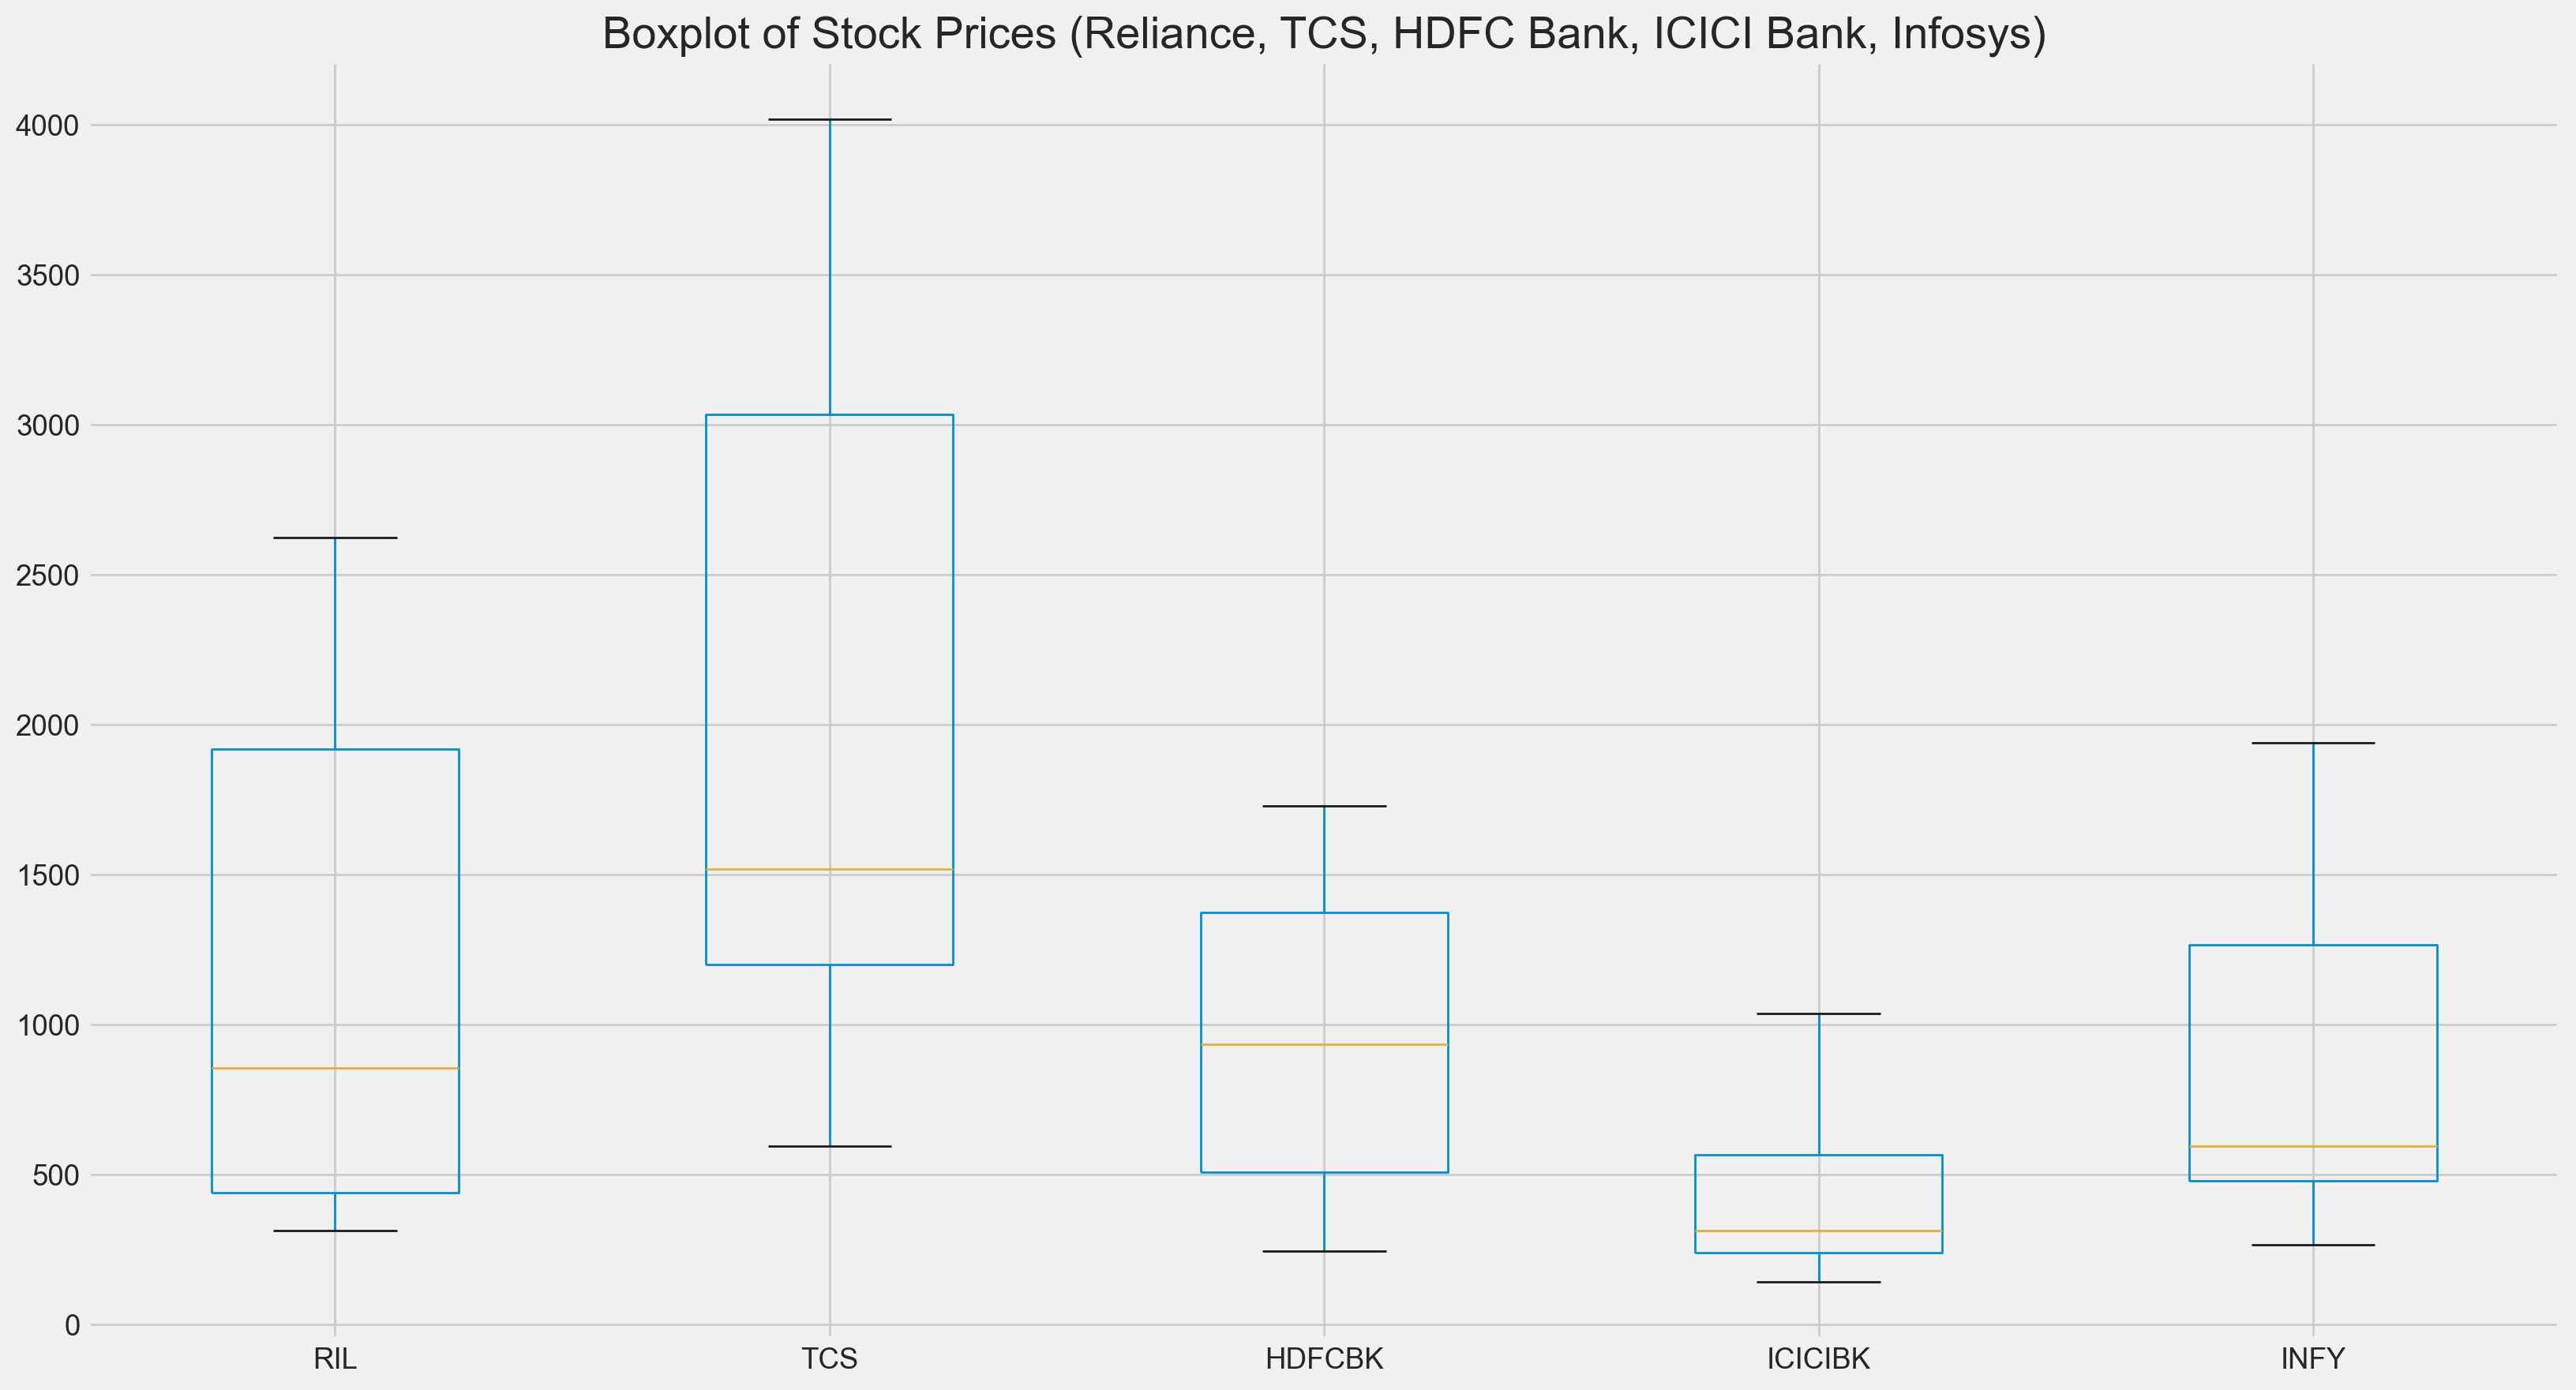

In [93]:
plt.style.use("fivethirtyeight")
dataset[['RIL','TCS','HDFCBK','ICICIBK','INFY']].boxplot()
plt.title("Boxplot of Stock Prices (Reliance, TCS, HDFC Bank, ICICI Bank, Infosys)")
plt.show()

> The boxplot reveals the presence of outliers in Reliance,TCS and Infosys stock prices, indicating significant deviations from the overall pattern. These outliers suggest the occurrence of notable events or market conditions that impacted the stock prices of these companies. Further analysis is required to understand the factors influencing these outliers and their implications for investment decisions.

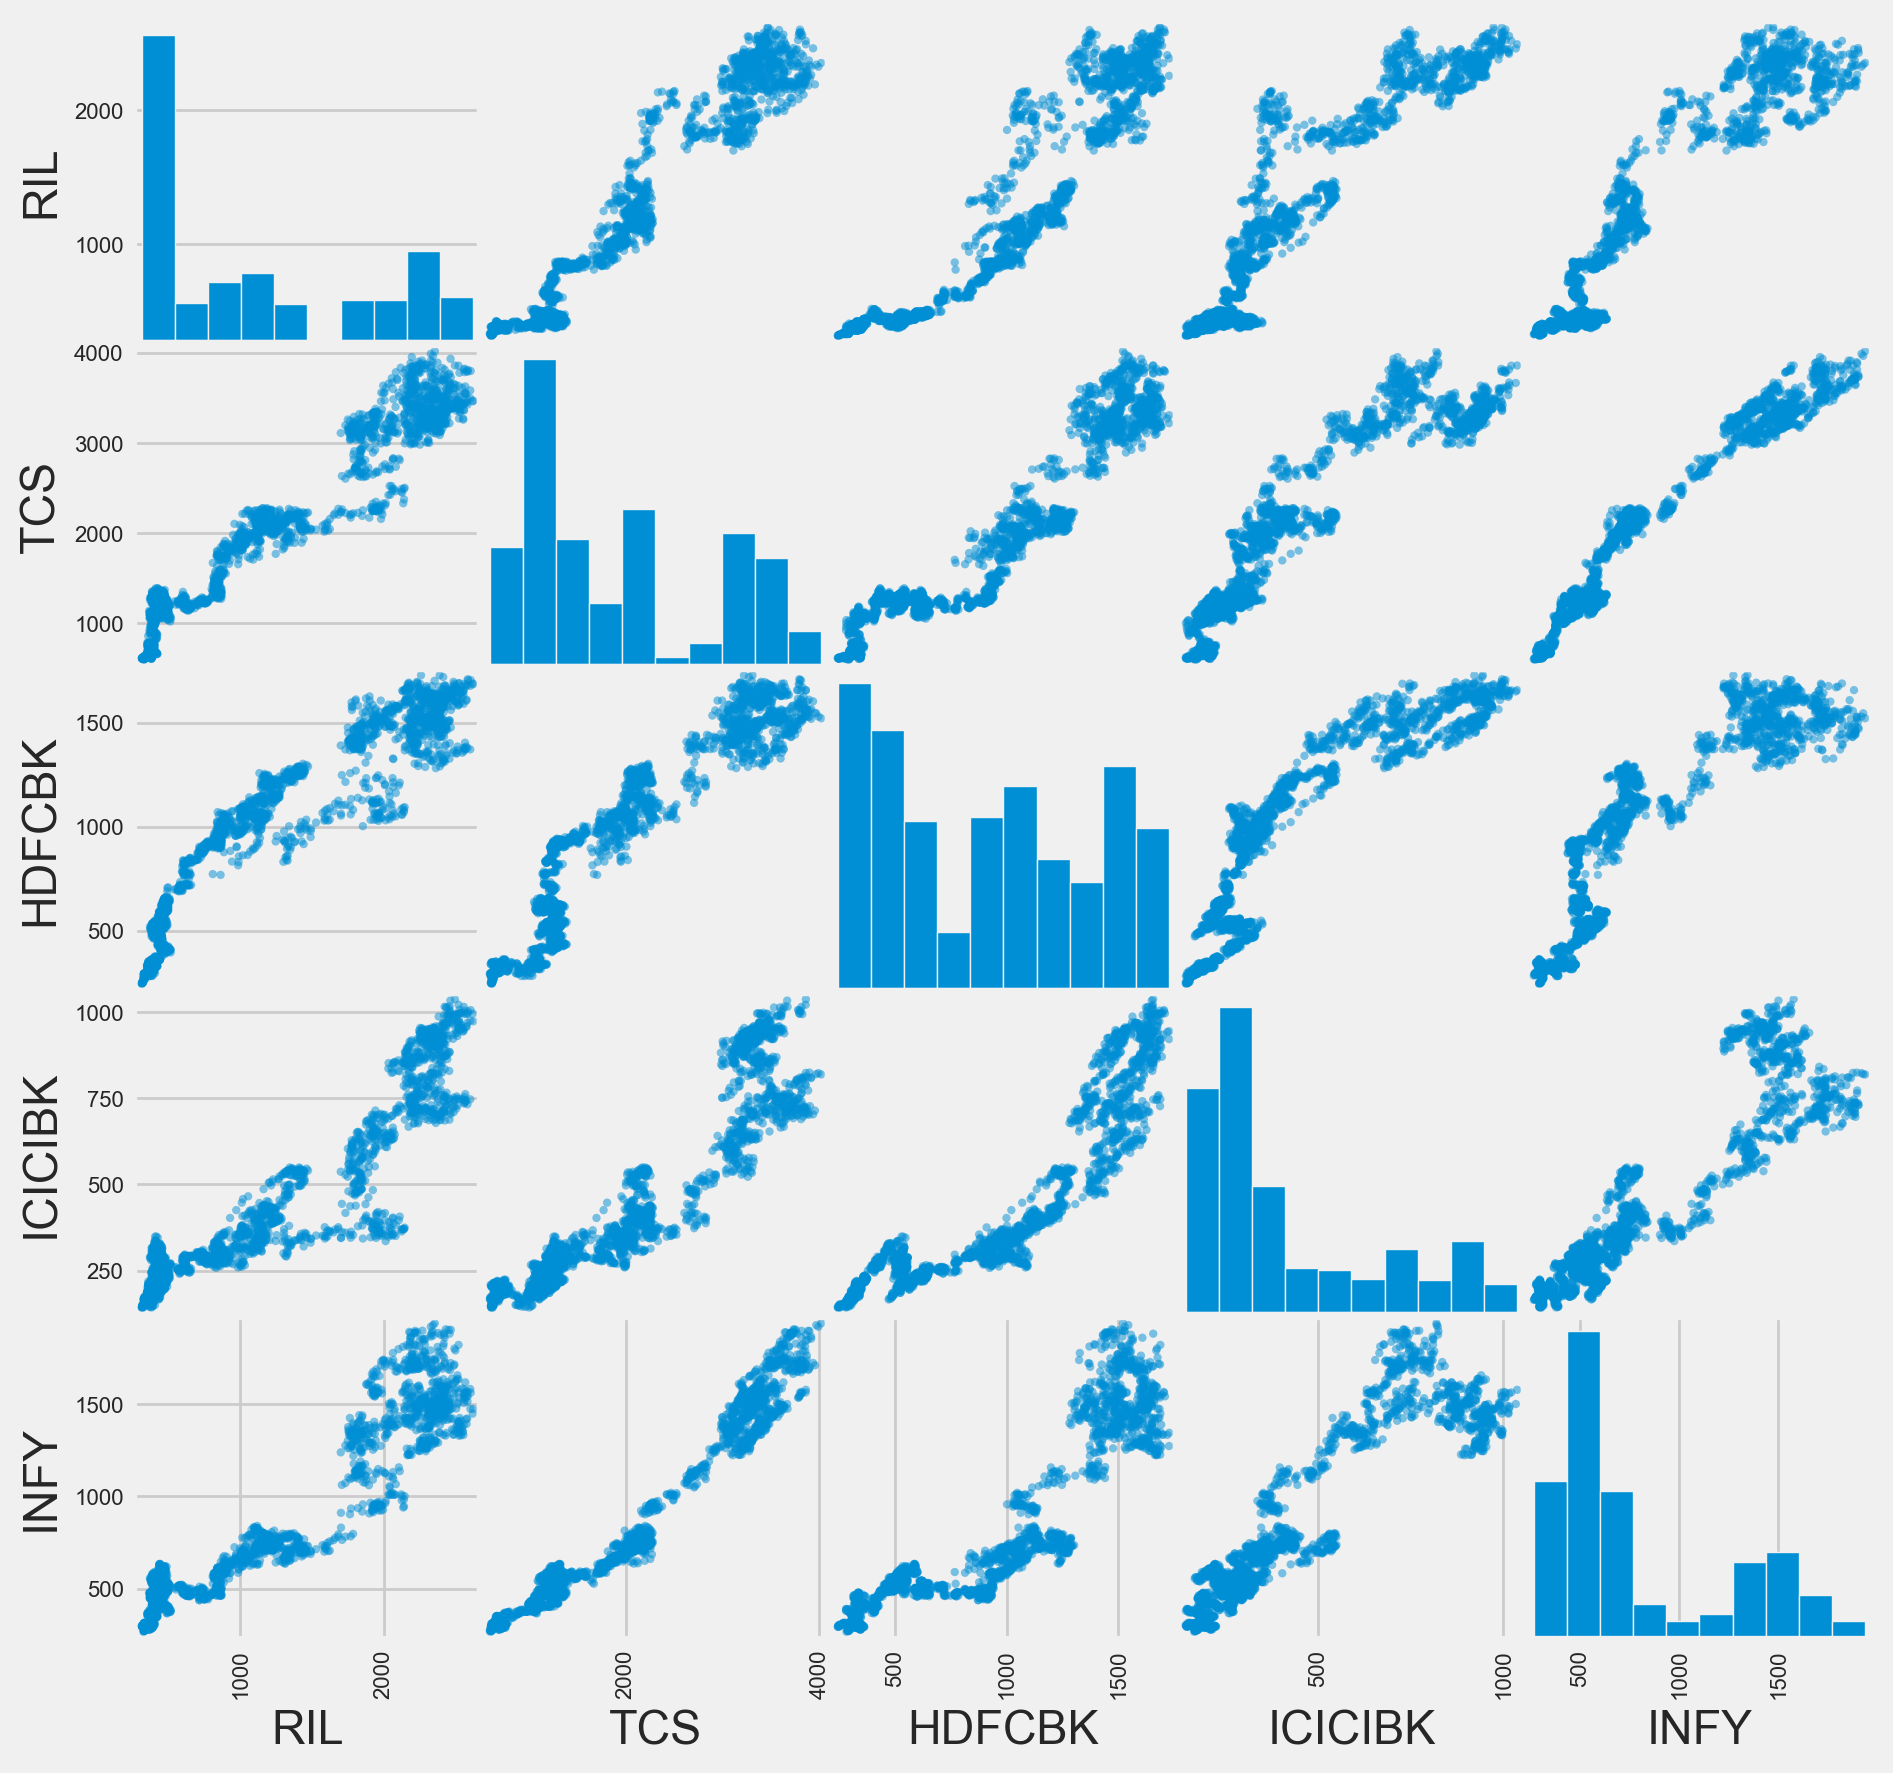

In [94]:
#dataset.hist(figsize=(10,10))
pd.plotting.scatter_matrix(dataset[['RIL','TCS','HDFCBK','ICICIBK','INFY']], figsize=(10,10))
plt.show()

## Visualization of the closing prices evolution of each company

In [95]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42 # I'm seeding with 42, if you try the same you will get the same results.
np.random.seed(RANDOM_SEED)

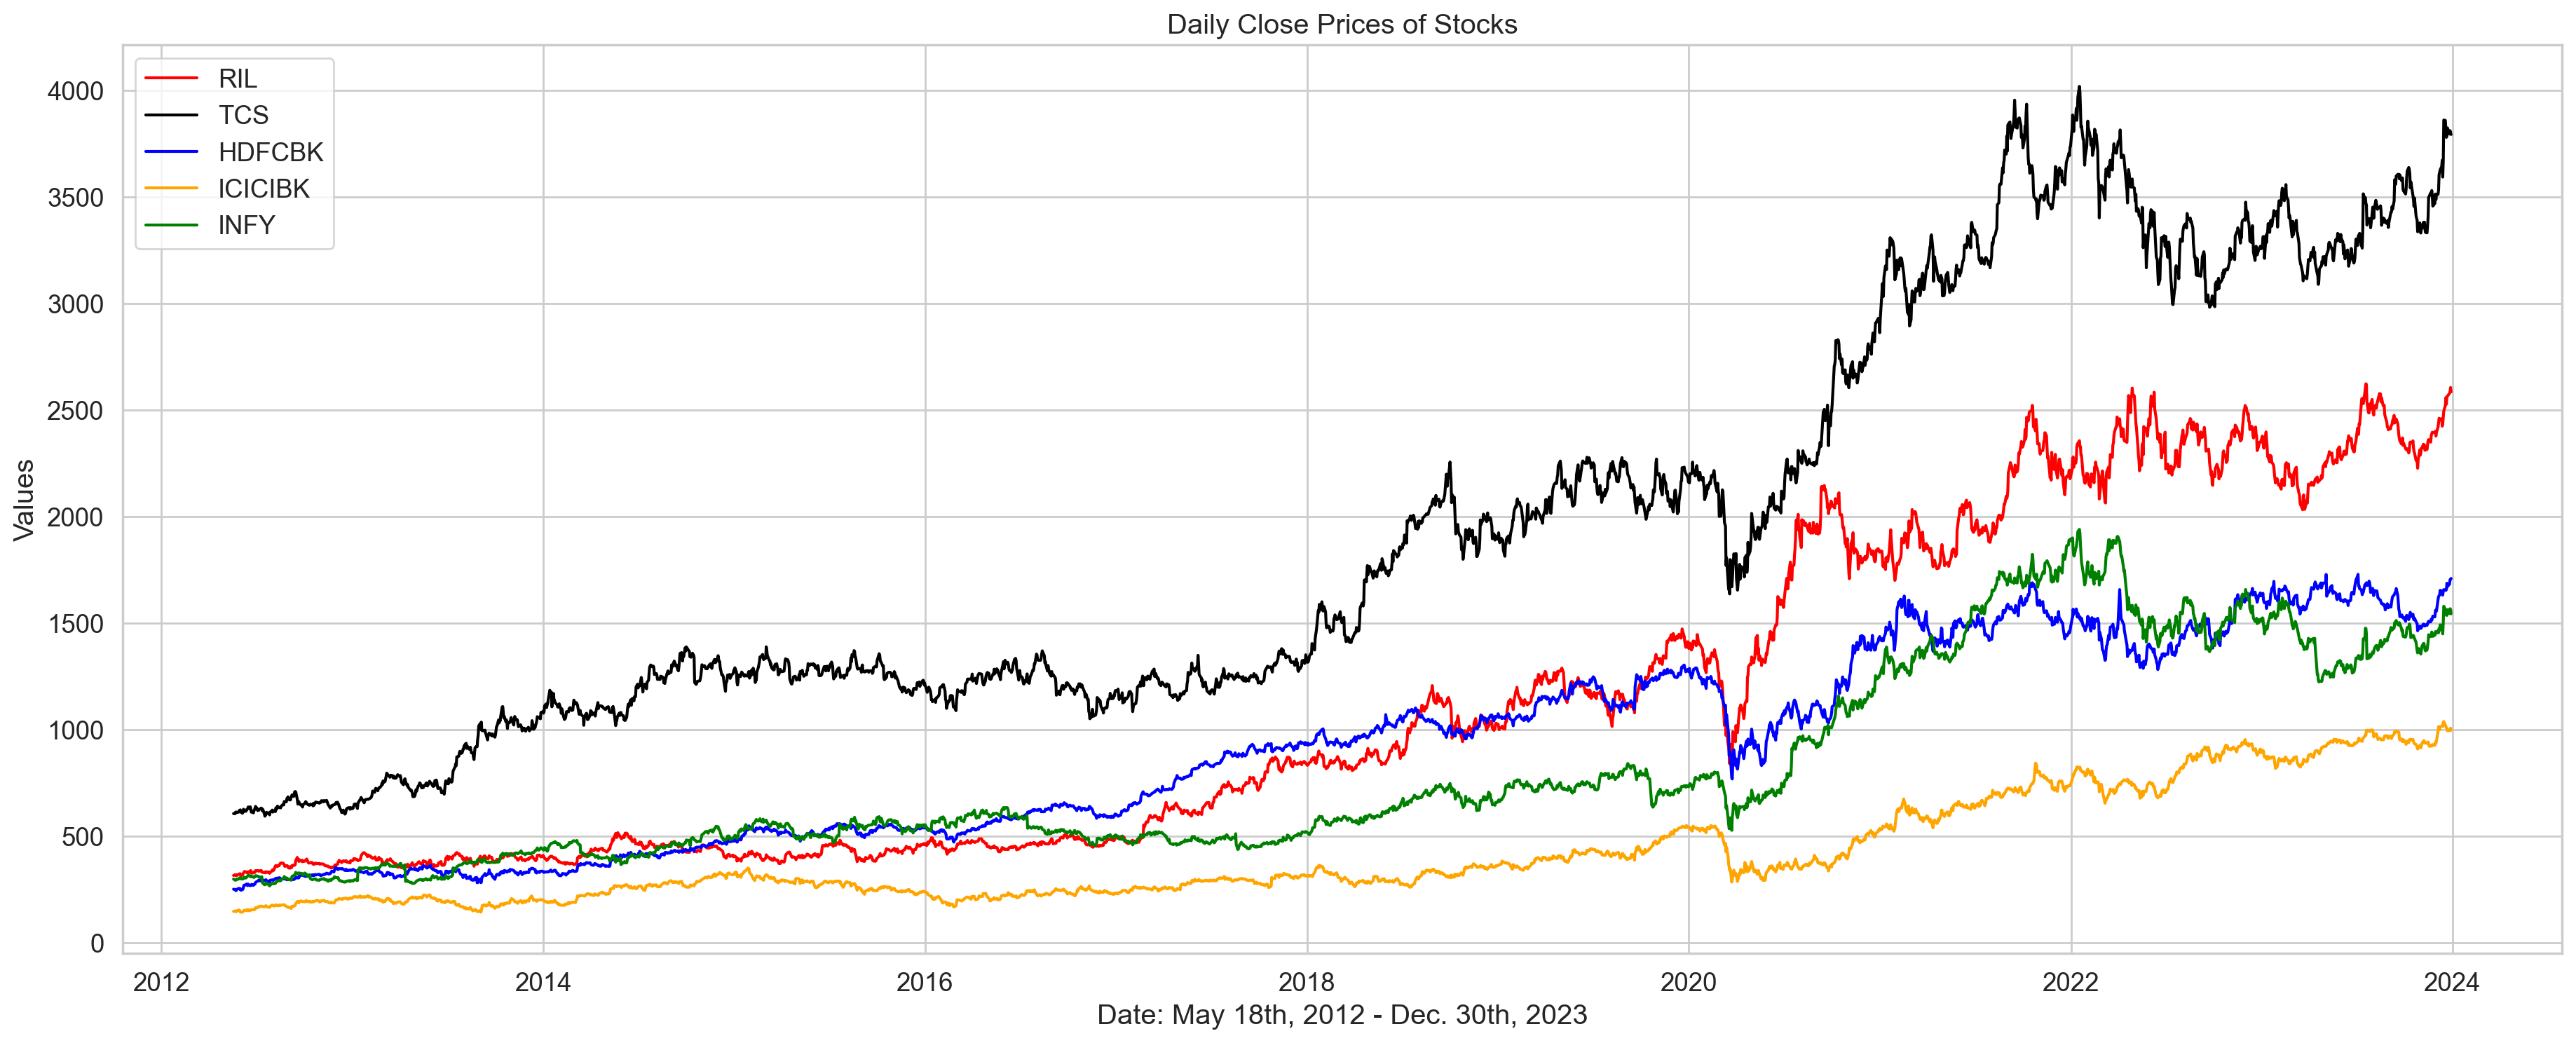

In [96]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of Stocks')
plt.xlabel('Date: May 18th, 2012 - Dec. 30th, 2023')
plt.ylabel('Values')
plt.plot(dataset['RIL'], 'red', label='RIL')
plt.plot(dataset['TCS'], 'black', label='TCS')
plt.plot(dataset['HDFCBK'], 'blue', label='HDFCBK')
plt.plot(dataset['ICICIBK'], 'orange', label='ICICIBK')
plt.plot(dataset['INFY'], 'green', label='INFY')
plt.legend()
plt.show()

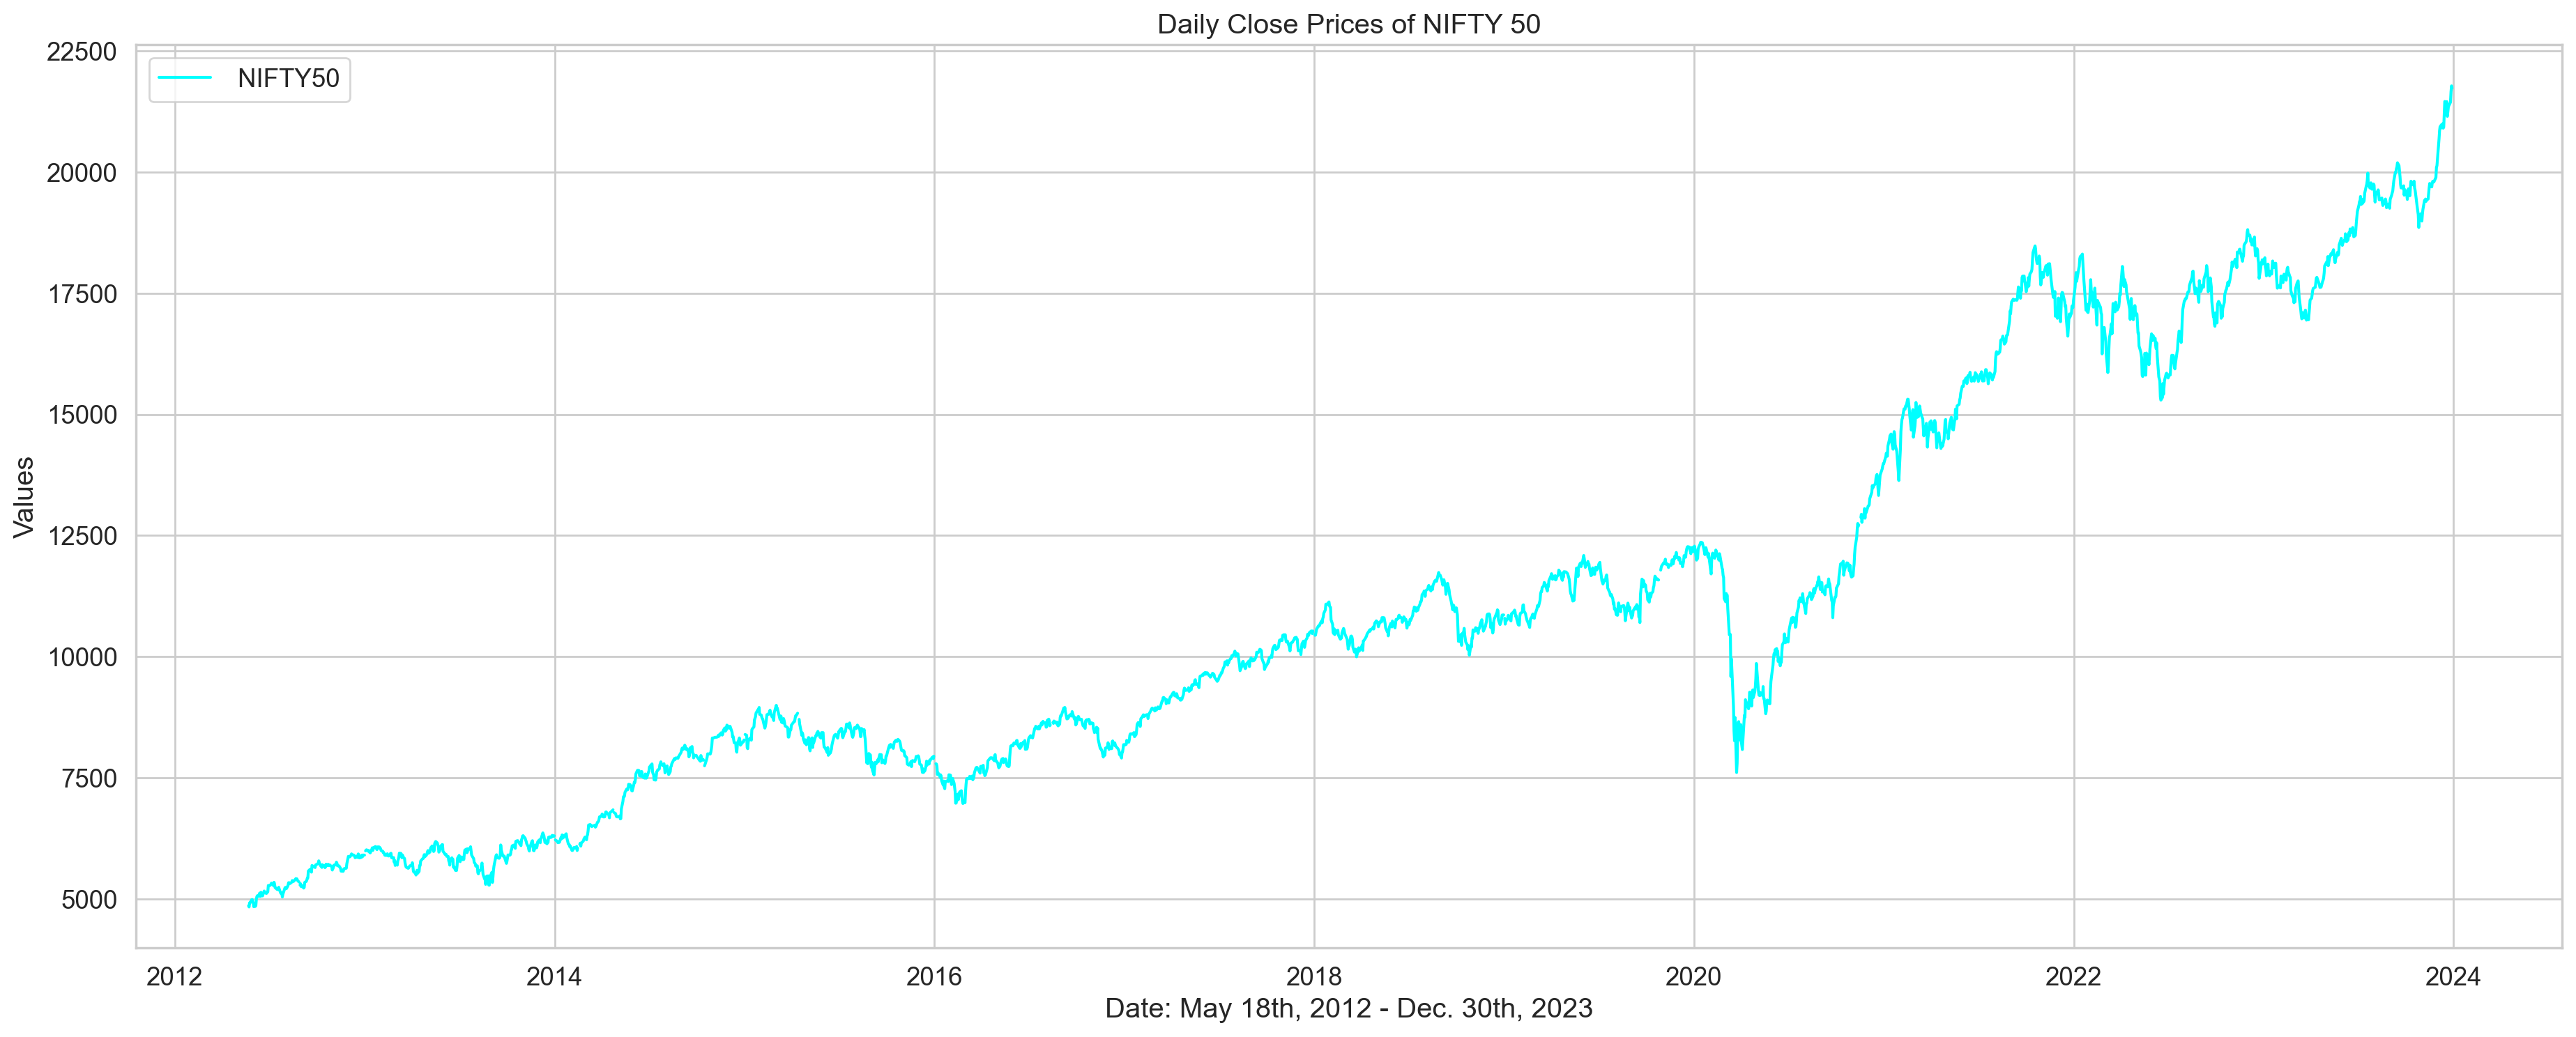

In [97]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of NIFTY 50')
plt.xlabel('Date: May 18th, 2012 - Dec. 30th, 2023')
plt.ylabel('Values')
plt.plot(dataset['NIFTY'], 'Cyan', label=' NIFTY50')
plt.legend()
plt.show()

The stock prices of companies (Reliance, TCS, HDFC bank, ICICI bank, Infosys) increased until the COVID-19 crisis in early 2020, followed by a recovery and subsequent fluctuations.

## Standard risk measure: Volatility (Returns)



Volatility is a standard risk measure that assesses the price fluctuations and stability of financial assets. The stock prices of companies (Reliance, TCS, HDFC bank, ICICI bank, Infosys) are known for their dynamic and often volatile nature, driven by rapid technological advancements and market disruptions. This higher volatility reflects the risks associated with investing in these companies. On the other hand, the NIFTY50, a broad market index representing 50 large-cap Indian companies, generally experiences lower volatility due to its diversified nature. However, during periods of market turbulence, the NIFTY50 can also exhibit increased volatility. Understanding and considering volatility is crucial for investors to evaluate risk and make informed investment decisions.

### Create a new columns in Dataset - Returns




The formula for Simple Return is a basic calculation that measures the percentage change in the value of an investment over a given period.

**Simple Return**
$$r_t=\frac{P_t-P_{t-1}}{P_{t-1}}$$

In [98]:
#Create a new columns Return in the dataset for each company's
dataset['R_RIL'] = dataset[['RIL']].pct_change(1)
dataset['R_TCS'] = dataset[['TCS']].pct_change(1)
dataset['R_HDFCBK'] = dataset[['HDFCBK']].pct_change(1)
dataset['R_ICICIBK'] = dataset[['ICICIBK']].pct_change(1)
dataset['R_INFY'] = dataset[['INFY']].pct_change(1)
dataset['R_NIFTY'] = dataset[['NIFTY']].pct_change(1)
dataset.head

<bound method NDFrame.head of                     RIL          TCS       HDFCBK      ICICIBK         INFY  \
Date                                                                          
2012-05-18   314.781891   605.325012   250.274994   146.399994   297.856262   
2012-05-21   317.959198   604.599976   248.725006   147.472733   292.556244   
2012-05-22   315.947662   612.025024   244.625000   145.600006   292.637512   
2012-05-23   314.004700   612.575012   243.600006   144.236359   293.524994   
2012-05-24   317.867767   610.724976   249.850006   149.199997   297.600006   
...                 ...          ...          ...          ...          ...   
2023-12-22  2565.050049  3824.000000  1670.849976   994.299988  1562.900024   
2023-12-26  2578.050049  3795.550049  1682.449951   995.099976  1543.949951   
2023-12-27  2586.850098  3811.199951  1703.300049  1002.250000  1567.099976   
2023-12-28  2605.550049  3799.899902  1705.250000  1005.900024  1562.650024   
2023-12-29  2584.94995

In [99]:
dataset.describe()

RIL          TCS       HDFCBK      ICICIBK         INFY  \
count  2865.000000  2865.000000  2865.000000  2865.000000  2865.000000   
mean   1125.890390  1932.086518   922.156763   420.040988   805.115531   
std     763.008216   975.601337   457.991775   245.485980   455.956518   
min     313.273254   592.950012   243.600006   142.127274   265.475006   
25%     437.873932  1198.974976   507.325012   239.227264   477.500000   
50%     853.666748  1517.050049   932.650024   311.149994   594.650024   
75%    1917.301025  3035.649902  1372.050049   565.900024  1265.199951   
max    2623.026611  4019.149902  1728.199951  1037.400024  1939.500000   

              NIFTY        R_RIL        R_TCS     R_HDFCBK    R_ICICIBK  \
count   2850.000000  2864.000000  2864.000000  2864.000000  2864.000000   
mean   11045.382147     0.000885     0.000755     0.000776     0.000874   
std     4258.193334     0.017312     0.015100     0.014495     0.020252   
min     4835.649902    -0.131539    -0.094103    -0.126069    -0.178478   
25%     7929.662598    -0.008798    -0.007313    -0.006601    -0.009812   
50%    10245.125000     0.000517     0.000620     0.000450     0.000136   
75%    14555.737305     0.010051     0.008795     0.007653     0.010890   
max    21778.699219     0.147180     0.098451     0.115996     0.146877   

            R_INFY      R_NIFTY  
count  2864.000000  2864.000000  
mean      0.000726     0.000575  
std       0.017352     0.010392  
min      -0.212586    -0.129805  
25%      -0.007738    -0.004433  
50%       0.000738     0.000698  
75%       0.009682     0.006114  
max       0.167851     0.087632

In [100]:
# Daily volatility (in %) of each stock
dataset[['R_RIL','R_TCS','R_HDFCBK','R_ICICIBK','R_INFY', 'R_NIFTY']].std()

R_RIL        0.017312
R_TCS        0.015100
R_HDFCBK     0.014495
R_ICICIBK    0.020252
R_INFY       0.017352
R_NIFTY      0.010392
dtype: float64

 > The descriptive statistics table provides valuable insights into the risk levels of each stock, as represented by their standard deviations. Among the stocks analysed, ICICI bank exhibits the highest level of risk with a standard deviation of $2.02\%$, indicating relatively more significant price fluctuations and potential volatility. Following Infosys,Reliance shows a lower but still significant level of risk with a standard deviation of $1.7\%$.

 > Comparatively, the risk associated with the NIFTY50 market is relatively lower, as indicated by its standard deviation of $1.03\%$. This suggests that, on average, the individual stocks of Infosys and Reliance carry higher risks than the overall market represented by the NIFTY50. These findings highlight the importance of considering risk factors when making investment decisions. Investors may opt to allocate their portfolio based on their risk appetite, taking into account the higher risk associated with specific stocks such as Infosys and Reliance compared to the broader market.

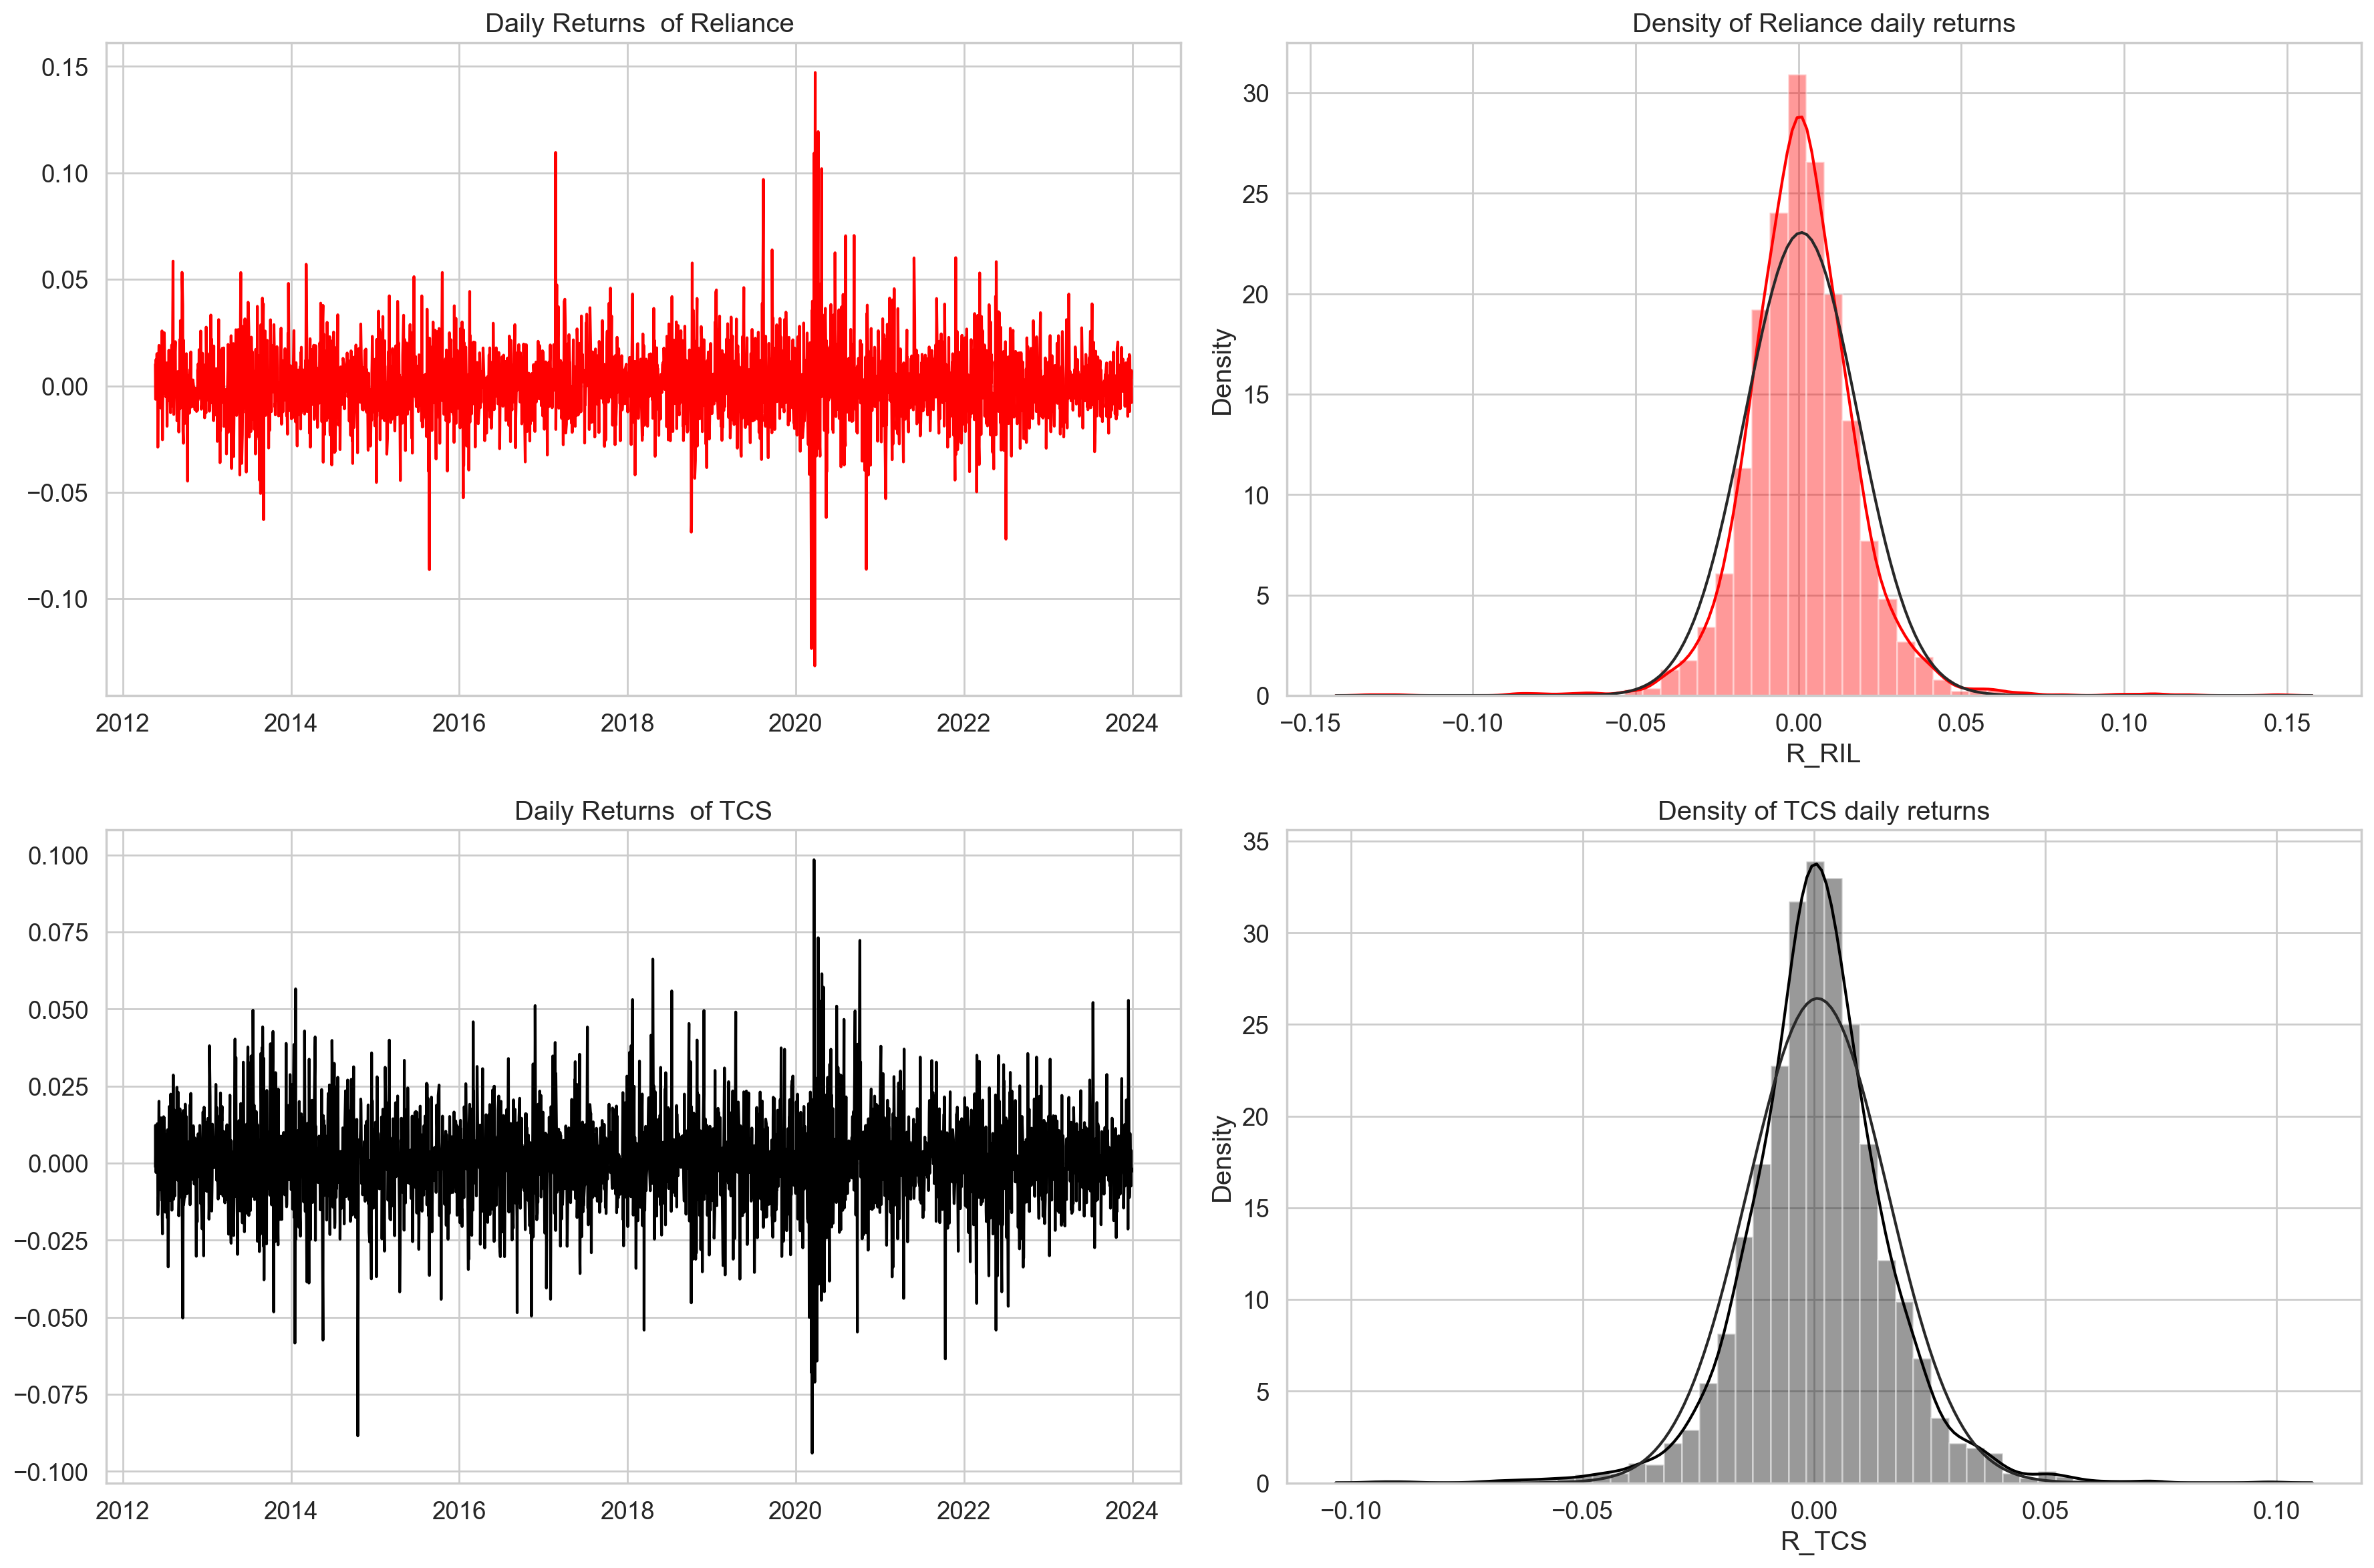

In [101]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_RIL'], color='red')
    axes[0][0].set_title('Daily Returns  of Reliance ')

    sns.distplot(dataset['R_RIL'], norm_hist=True, fit=stats.norm, color='red',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Reliance daily returns')

    axes[1][0].plot(dataset['R_TCS'], color='black')
    axes[1][0].set_title('Daily Returns  of TCS')

    sns.distplot(dataset['R_TCS'], norm_hist=True, fit=stats.norm, color='black',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of TCS daily returns')
    plt.tight_layout()
    fig.show();

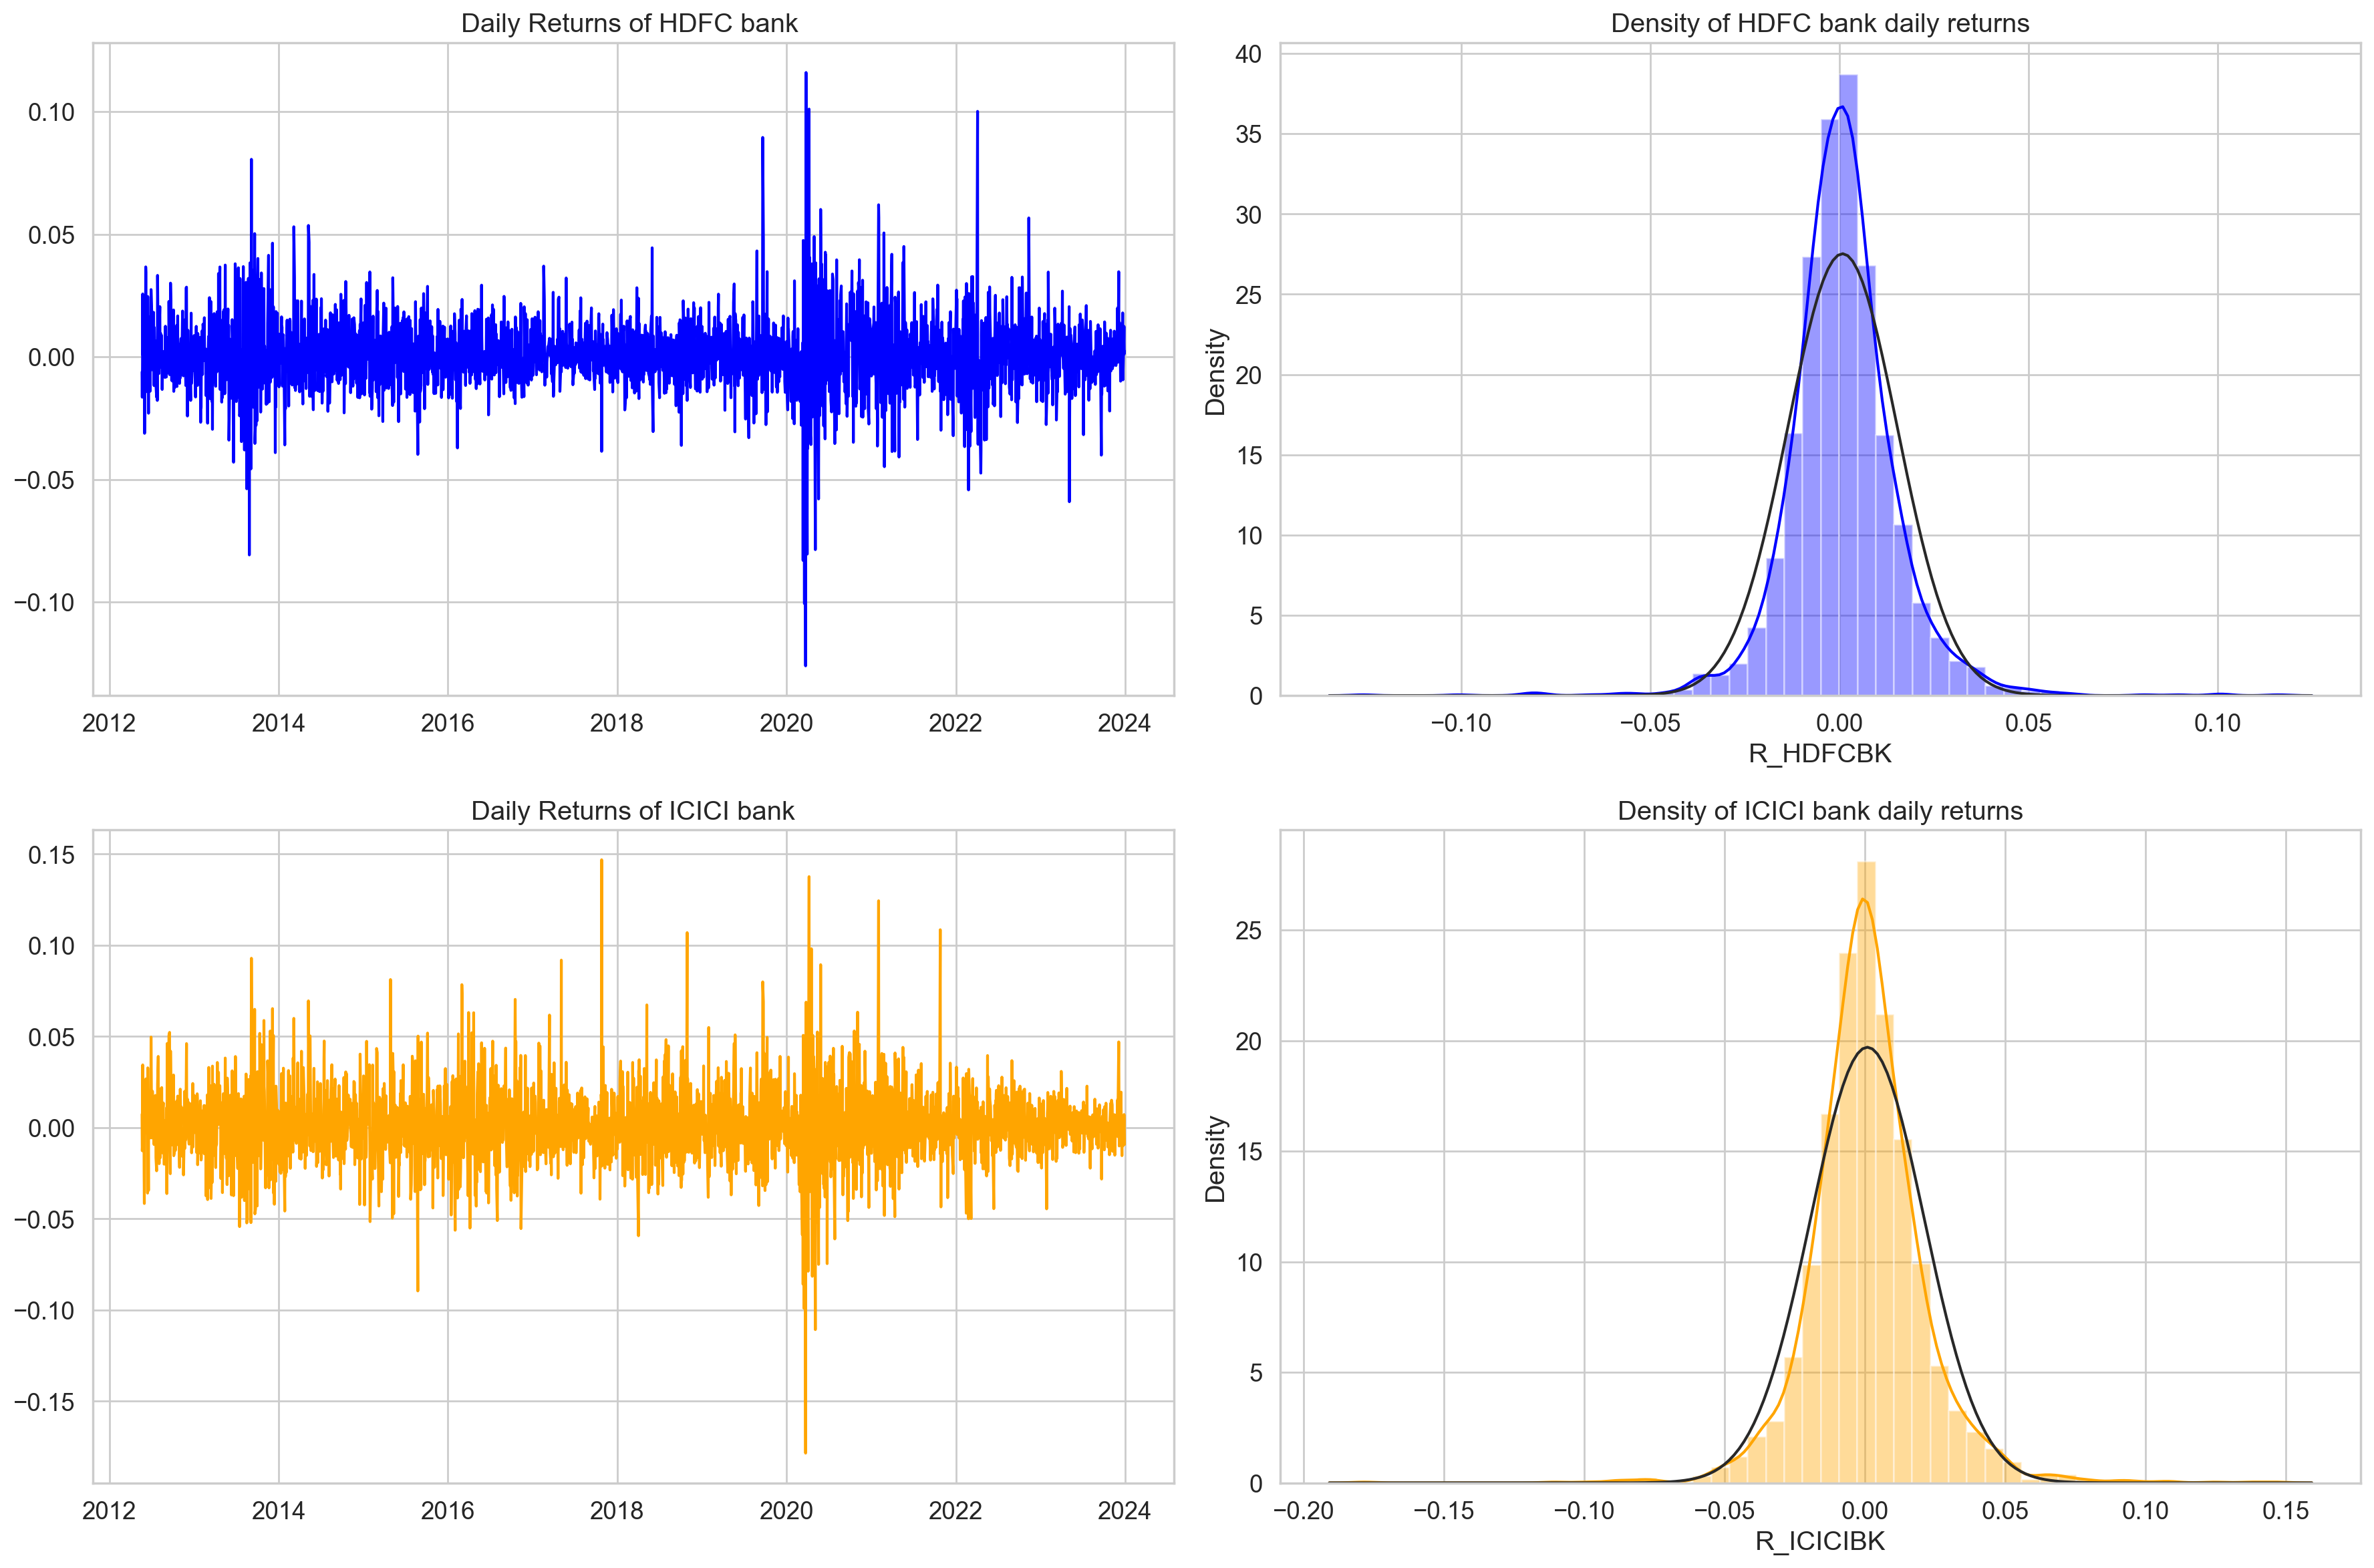

In [102]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_HDFCBK'], color='blue')
    axes[0][0].set_title('Daily Returns of HDFC bank ')

    sns.distplot(dataset['R_HDFCBK'], norm_hist=True, fit=stats.norm, color='blue',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of HDFC bank daily returns')

    axes[1][0].plot(dataset['R_ICICIBK'], color='orange')
    axes[1][0].set_title('Daily Returns of ICICI bank')

    sns.distplot(dataset['R_ICICIBK'], norm_hist=True, fit=stats.norm, color='orange',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of ICICI bank daily returns')
    plt.tight_layout()
    fig.show();

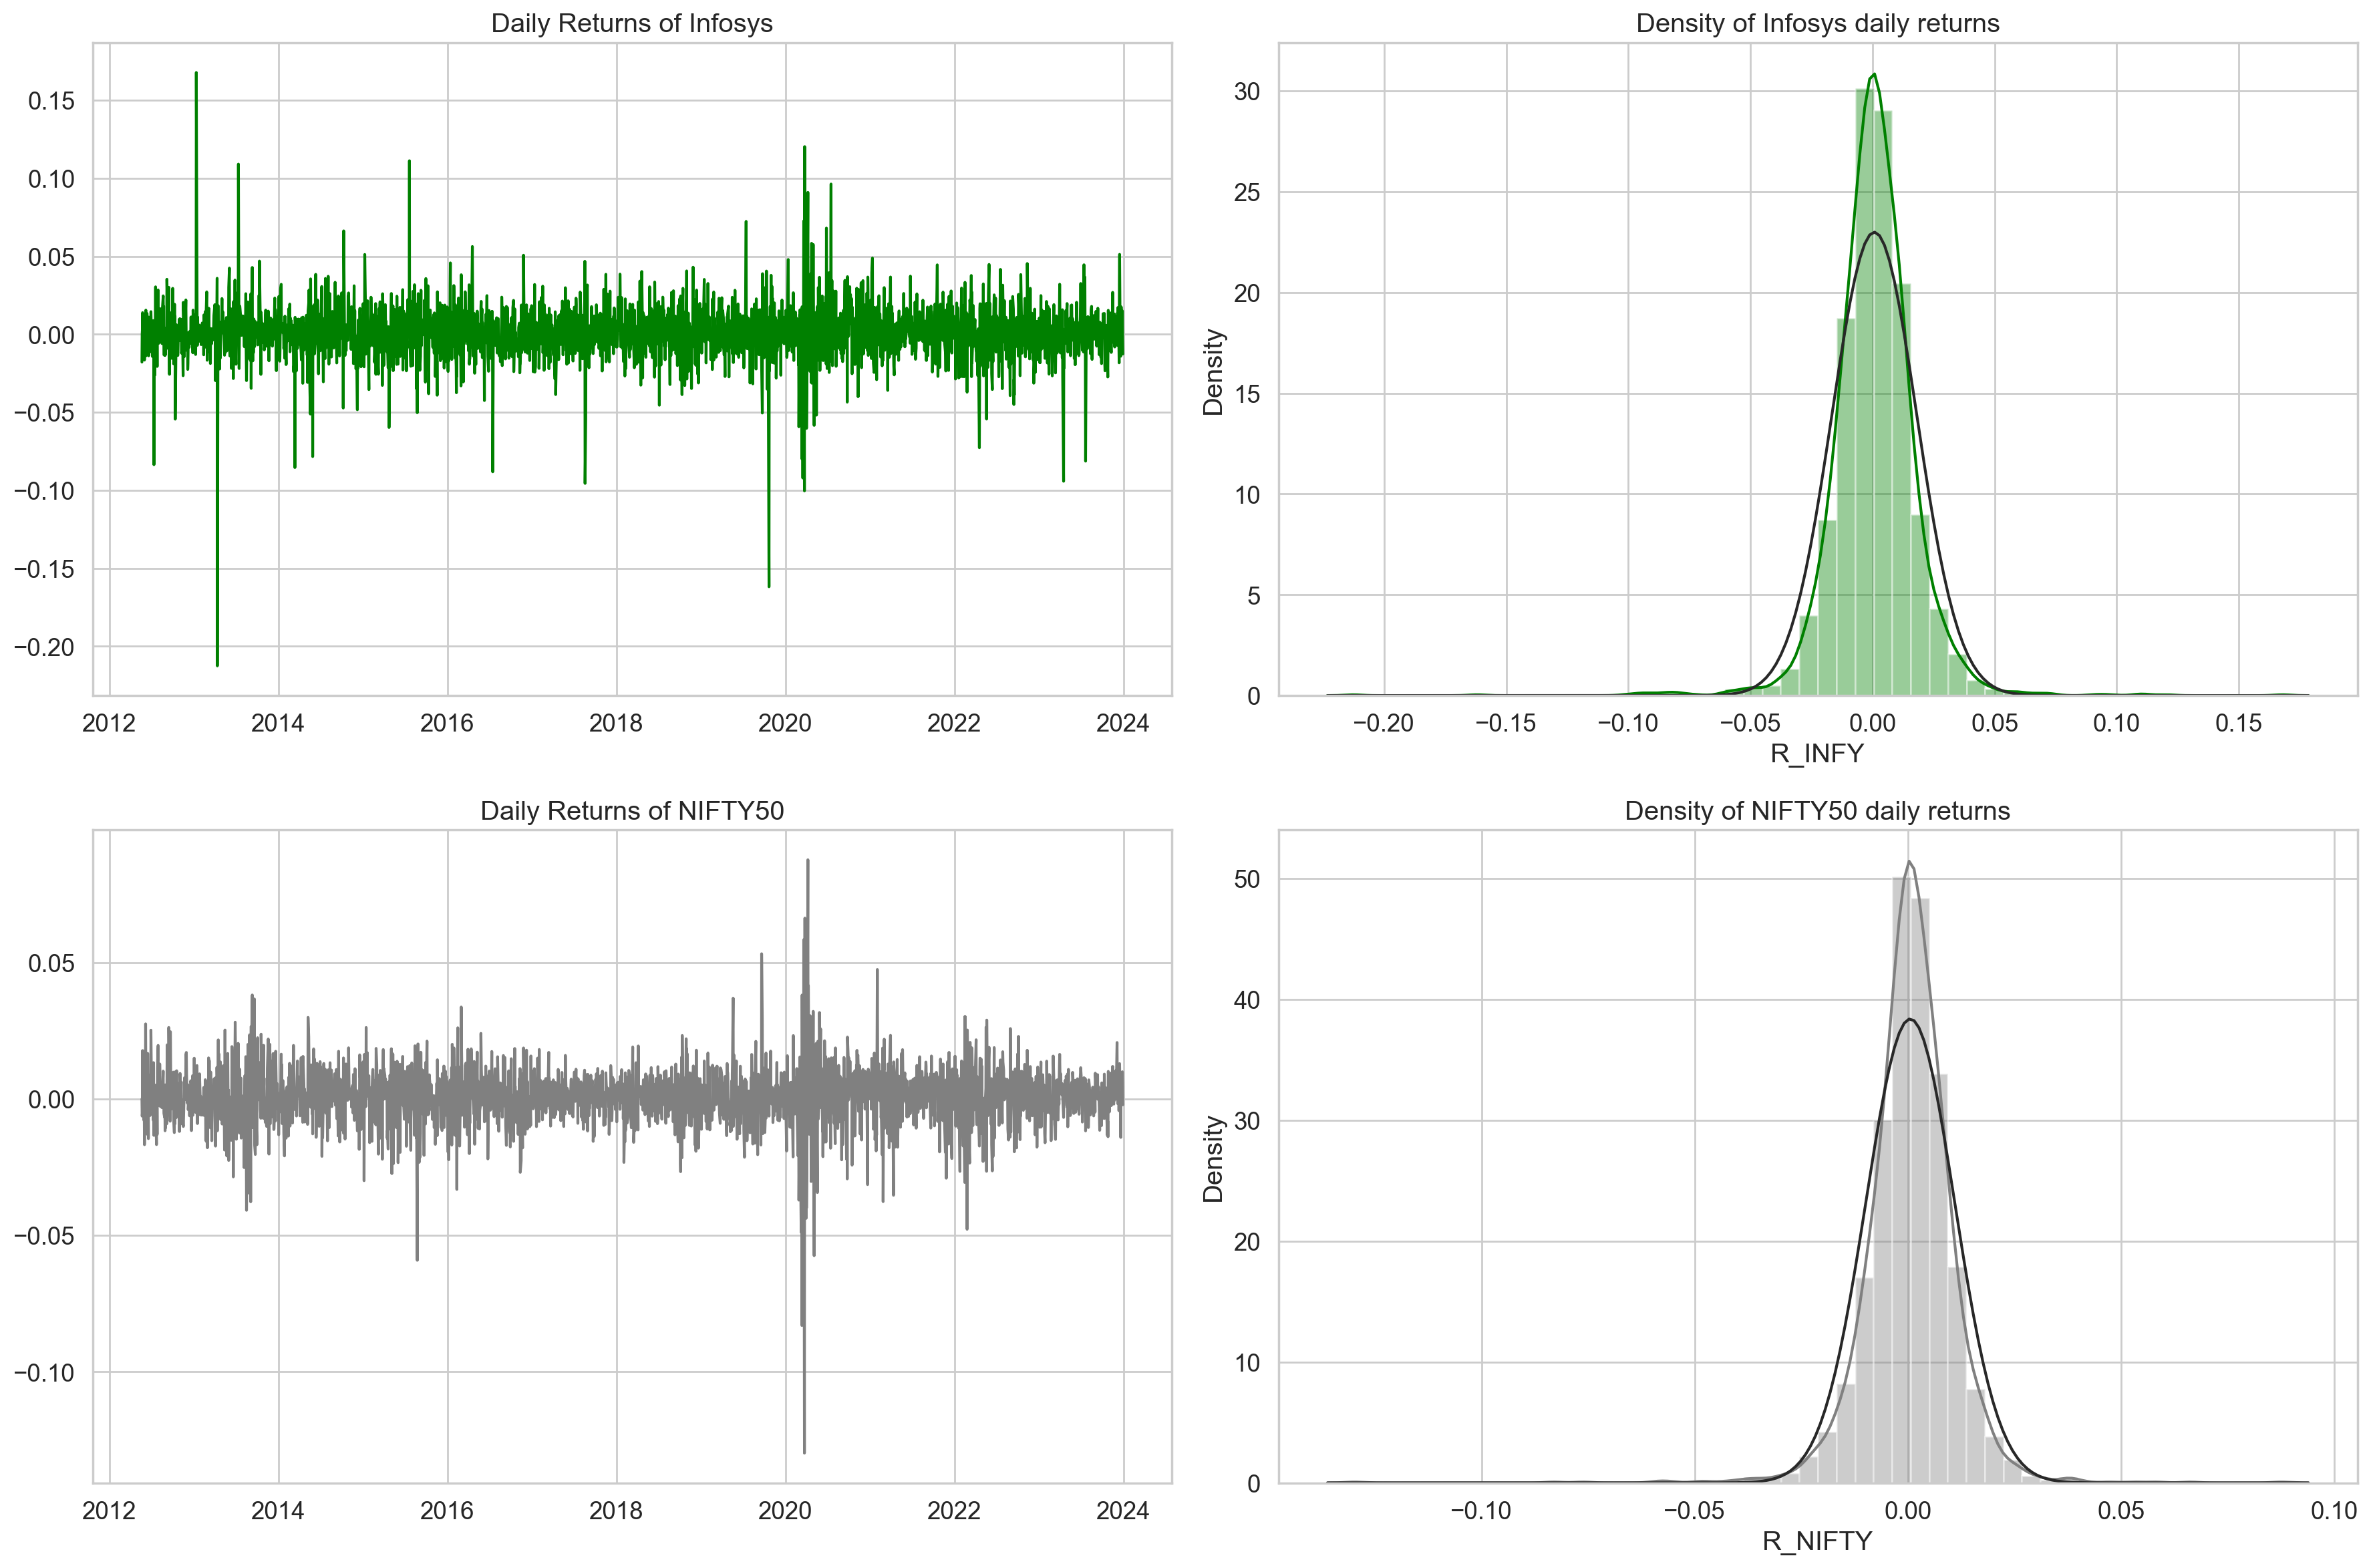

In [103]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_INFY'], color='green')
    axes[0][0].set_title('Daily Returns of Infosys')

    sns.distplot(dataset['R_INFY'], norm_hist=True, fit=stats.norm, color='green',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Infosys daily returns')

    axes[1][0].plot(dataset['R_NIFTY'], color='grey')
    axes[1][0].set_title('Daily Returns of NIFTY50')

    sns.distplot(dataset['R_NIFTY'], norm_hist=True, fit=stats.norm, color='grey',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of NIFTY50 daily returns')
    plt.tight_layout()
    fig.show();

>  The return graphs indicate periods of high volatility in Reliance,TCS, HDFC bank, ICICI bank, Infosys and NIFTY50, particularly at the beginning of 2020 due to the COVID-19 crisis. During this time, the stock returns experienced significant fluctuations and increased volatility, reflecting the pandemic's market uncertainty and economic impact.

> Apart from these volatile periods, the density of returns for each company appears to be symmetric around the origin, suggesting a balanced distribution of positive and negative returns. Additionally, the returns of each company exhibit a pattern that closely follows a normal distribution. This implies on average, the returns of these stocks tend to cluster near the mean value, with fewer extreme outliers.

> Understanding the volatility and distribution of returns is crucial for investors as it provides insights into the potential risks and rewards associated with investing in these companies. It enables investors to evaluate historical performance and make informed decisions based on risk appetite and return expectations.

# Portfolio Optimization using Efficient Frontier

Portfolio Optimization using the Efficient Frontier is a powerful approach to construct an optimal investment portfolio by considering the stock prices of Reliance, TCS, HDFC bank, ICICI bank, Infosys and NIFTY50. The Efficient Frontier is a graphical representation that illustrates the trade-off between risk and return for different portfolio allocations. By analyzing the historical data and expected returns of these stocks, along with their correlations, portfolio optimization techniques can help investors identify the optimal combination of assets that maximize returns for a given level of risk or minimize risk for a desired level of return. This approach allows investors to make well-informed decisions, diversify their investments, and potentially achieve higher returns while managing risk effectively in the context of these prominent companies and the broader market represented by the NIFTY50.

### Correlation coefficients between companies' close prices

The correlation coefficients between the close prices of Reliance, TCS, HDFC bank, ICICI bank, Infosys and NIFTY50 provide insights into the degree of linear relationship between the individual stock prices and the overall market. These coefficients quantify the strength and direction of the relationship, helping investors understand the level of synchronisation or divergence between these companies' stocks and the broader market.

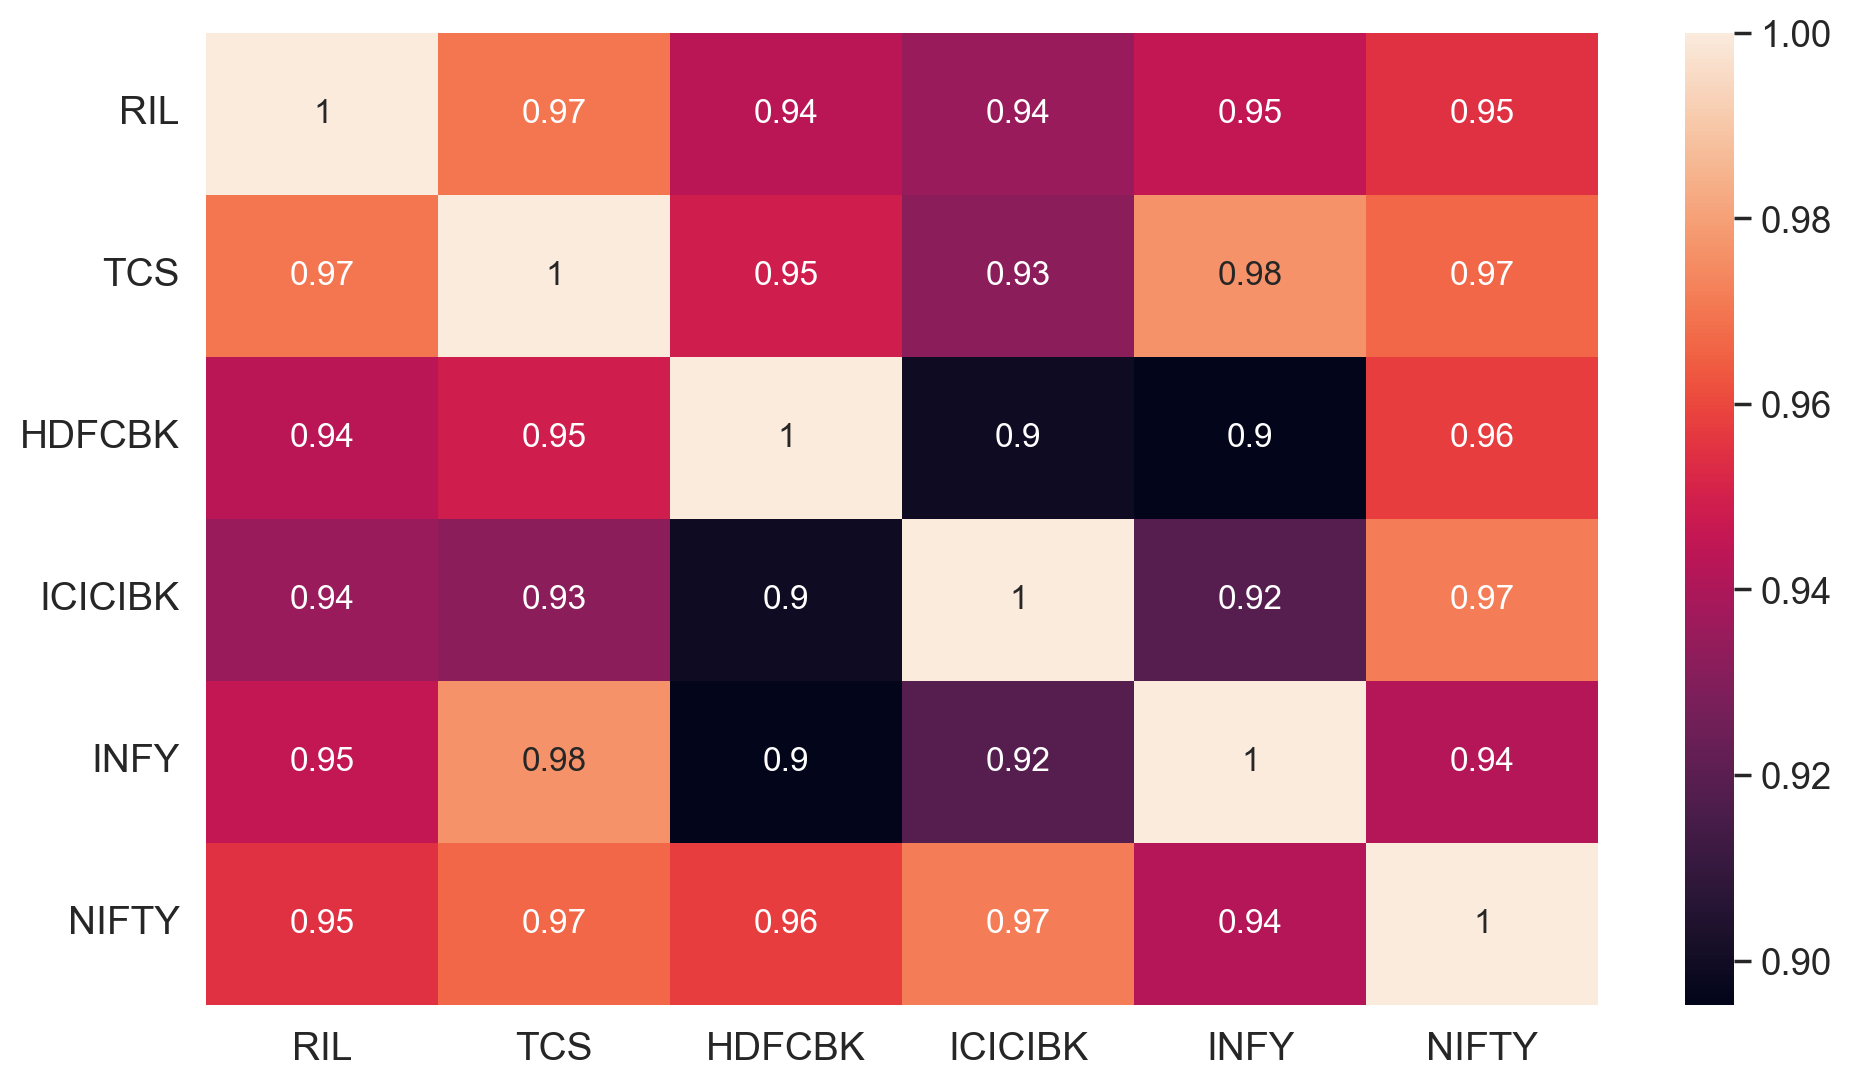

In [104]:
corr = dataset[['RIL','TCS','HDFCBK','ICICIBK','INFY', 'NIFTY']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14,rotation="horizontal")
plt. show()

> The correlation map of daily prices reveals strong positive correlations between the NIFTY50 and other stocks. These correlations indicate a tendency for the stock prices of these companies to move in a similar direction, highlighting potential interdependencies and providing insights for portfolio diversification strategies.

### Correlation coefficients between companies' returns

The correlation coefficients between the returns of Reliance, TCS, HDFC bank, ICICI bank, Infosys and NIFTY50 provide a measure of the interdependence or independence of these companies' returns concerning the broader market, aiding investors in assessing the diversification potential and risk associated with including these stocks in their portfolios.

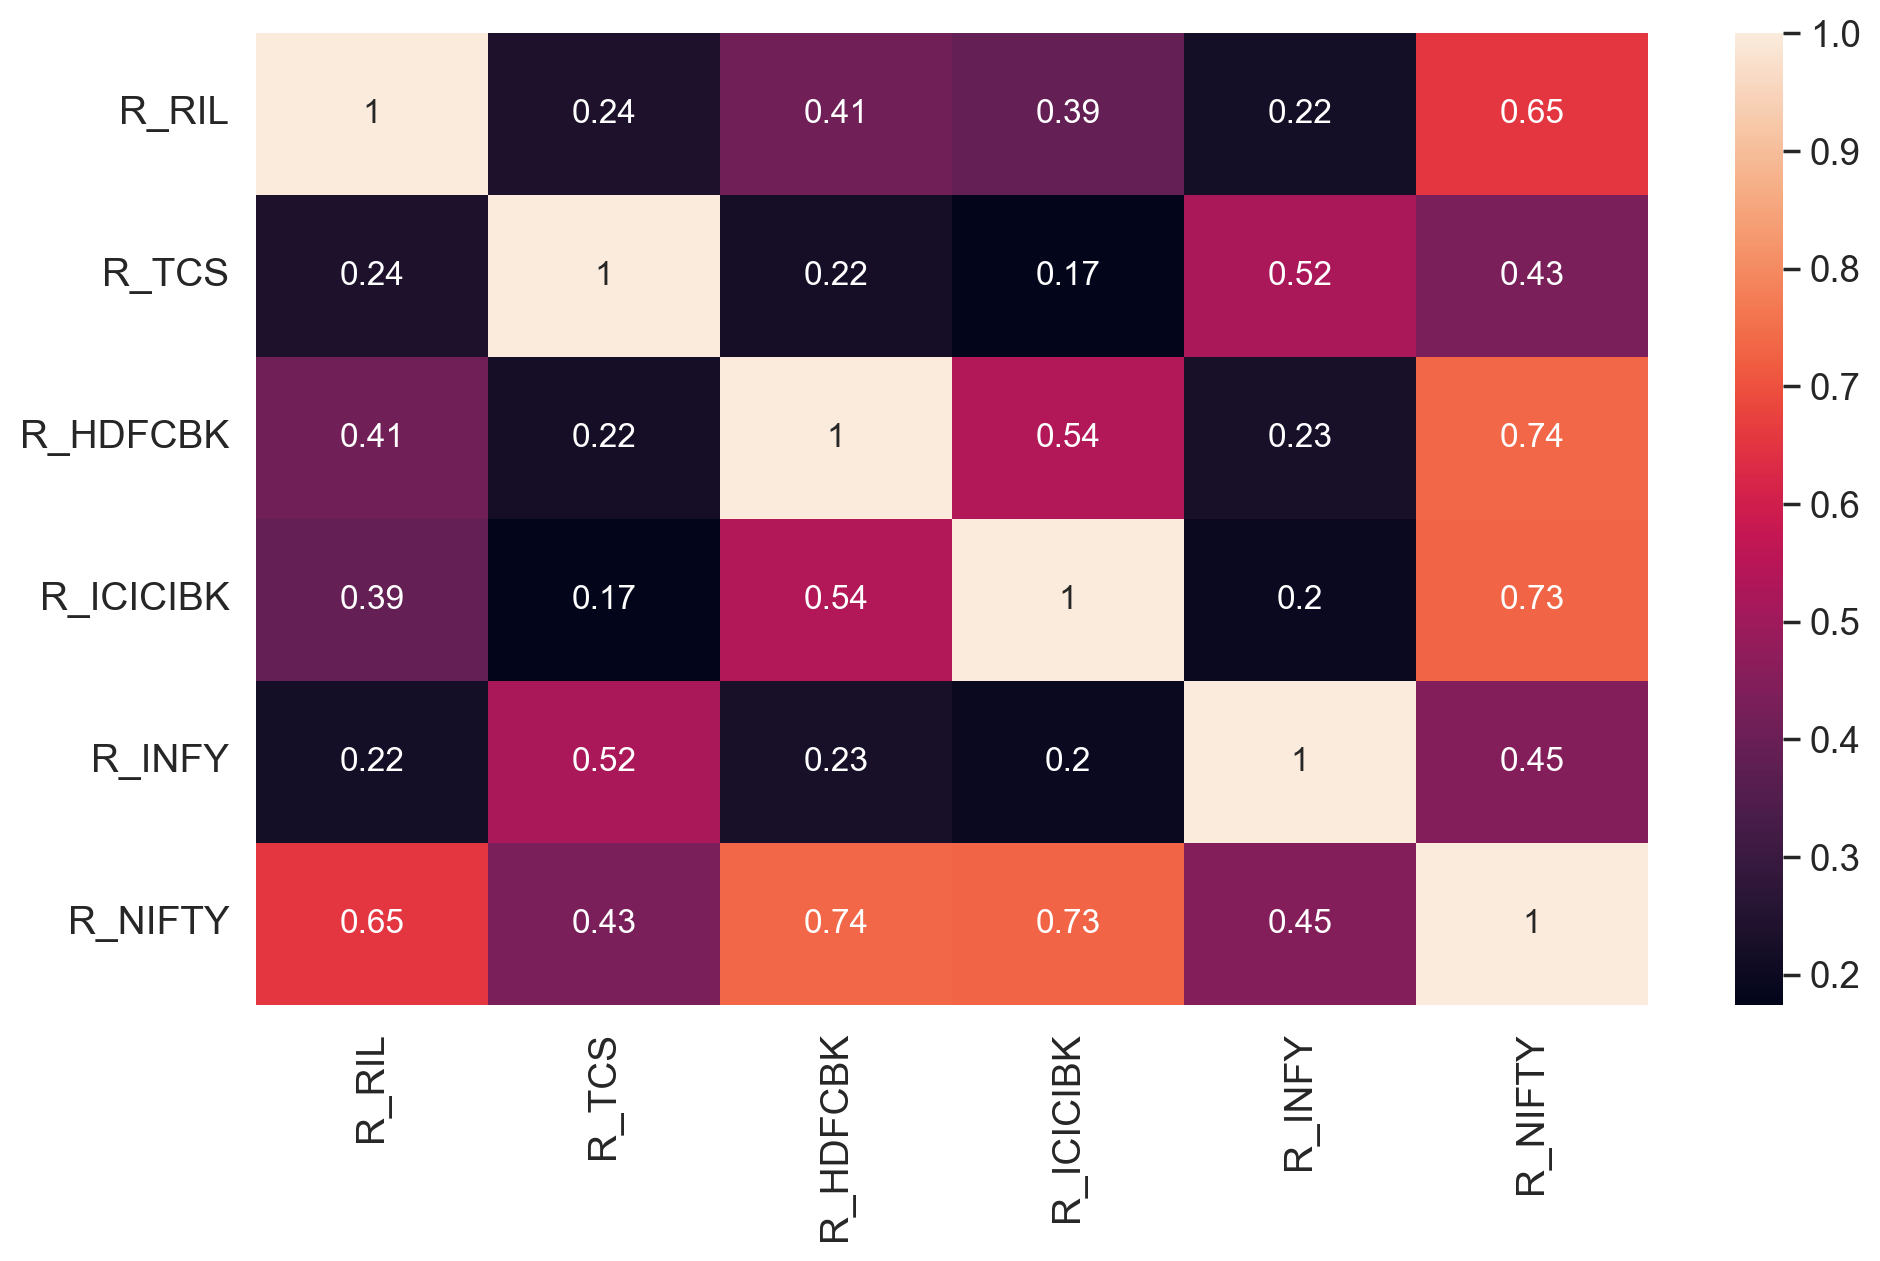

In [105]:
corr = dataset[['R_RIL','R_TCS','R_HDFCBK','R_ICICIBK','R_INFY', 'R_NIFTY']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14,rotation="vertical")
plt.yticks(fontsize=14,rotation="horizontal",)
plt. show()

> The correlation map of returns prices demonstrates a strong positive correlation between the returns of the NIFTY50 and the returns of ICICI bank and HDFC bank. This indicates a tendency for the two to move in a similar direction, suggesting that overall market performance changes influence ICICI bank and HDFC bank's stock returns.

*  $$\mbox{Annualized Volatility} = \mbox{Daily Volatility}_i \times \sqrt{252}= \mbox{Returns}_i\times \sqrt{252},$$
$$\;\;\;\;i=\{\mbox{RIL}, \mbox{TCS}, \mbox{HDFCBK}, \mbox{ICICIBK}, \mbox{INFY}, \mbox{NIFTY} \}$$



*  $$\mbox{Monthly volatility} = \mbox{Daily Volatility}_i \times \sqrt{21}= \mbox{Returns}_i\times \sqrt{21},$$
$$\;\;\;\;i=\{\mbox{RIL}, \mbox{TCS}, \mbox{HDFCBK}, \mbox{ICICIBK}, \mbox{INFY}, \mbox{NIFTY} \}$$


**Note**: There are 252 trading days per year and 21 trading days per month.

In [106]:
returns  = dataset[['R_RIL','R_TCS','R_HDFCBK','R_ICICIBK','R_INFY', 'R_NIFTY']]
n_days = 252
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per year')

The volatility of the stock of R_RIL = 27.48 % per year
The volatility of the stock of R_TCS = 23.97 % per year
The volatility of the stock of R_HDFCBK = 23.01 % per year
The volatility of the stock of R_ICICIBK = 32.15 % per year
The volatility of the stock of R_INFY = 27.55 % per year
The volatility of the stock of R_NIFTY = 16.5 % per year


We can see that the annual volatility of ICICIBK ($32.15\%$) is higher than the other stocks.

In [107]:
returns  = dataset[['R_RIL','R_TCS','R_HDFCBK','R_ICICIBK','R_INFY', 'R_NIFTY']]
n_days = 21
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per month')

The volatility of the stock of R_RIL = 7.93 % per month
The volatility of the stock of R_TCS = 6.92 % per month
The volatility of the stock of R_HDFCBK = 6.64 % per month
The volatility of the stock of R_ICICIBK = 9.28 % per month
The volatility of the stock of R_INFY = 7.95 % per month
The volatility of the stock of R_NIFTY = 4.76 % per month


We can see that ICICIBK's monthly volatility ($9.28\%$) is still higher than other stocks.

> ICICIBK exhibits higher annual volatility ($32.15\%$) than the other stocks, indicating more significant price fluctuations and potential risk. Even every month, ICICIBK's volatility ($9.28\%$) remains higher than the other stocks, suggesting higher price swings.

## Sharpe ratio

The Sharpe ratio measures the risk-adjusted return for companies like Reliance, TCS, HDFC bank, ICICI bank, Infosys and NIFTY50. By comparing their respective Sharpe ratios, we can assess the efficiency of each investment in generating returns relative to the level of risk. A higher Sharpe ratio indicates better risk-adjusted performance, implying that the acquisition provides higher returns for the risk taken. Analysing the Sharpe ratios of these companies and comparing them to the NIFTY50 helps investors evaluate each investment option's relative attractiveness in balancing risk and return.

It is calculated by the formula below:

$$
\text{Sharpe ratio} = \frac{R_p - R_f}{\sigma_p}
$$

where:

- \( R_p \) is the return of the portfolio.
- \( R_f \) is the risk-free rate.
- \( \sigma_p \) is the standard deviation of the portfolio's excess return.



In [108]:
n_days = 252
def sharpe_ratio (serie, rf = 0.025):
    ''''
    serie : Series of daily returns of the stock or portfolio
    rf: annual return on a risk-free investment (default rf=0.025)
    '''''
    # Mean Annualized Return
    rp = serie.mean()*n_days
    # Annual volatility
    volatility = serie.std()*np.sqrt(n_days)
    # Sharpe ratio
    sharpe = (rp -rf  ) / volatility
    return sharpe

In [109]:
# Let's consider a risk-free investment with an annual return of 2.5% and
#we calculate the Sharpe Ratio of each stock
for col in returns.columns:
    print("The Sharpe ratio of,", col,"=", round(sharpe_ratio(returns[col]),2 ))

The Sharpe ratio of, R_RIL = 0.72
The Sharpe ratio of, R_TCS = 0.69
The Sharpe ratio of, R_HDFCBK = 0.74
The Sharpe ratio of, R_ICICIBK = 0.61
The Sharpe ratio of, R_INFY = 0.57
The Sharpe ratio of, R_NIFTY = 0.73


**Interpretation of the Sharpe Ratio**

The Sharpe ratio gives the excess return of a stock (or a portfolio) per unit of risk.

* The Sharpe ratio of the NIFTY50 is equal to 0.73. Given a unit of risk, the NIFTY50 has an excess annual return of $73\%$ compared to a risk-free investment with an annual return of $2.5\%$.

*  For the same unit of risk, HDFC bank has an annual excess return of $74\%$ compared to a risk-free investment with an annual return of $2.5\%$.

Under these conditions, the best stock is HDFC bank because it has the highest Sharpe ratio.

> The Sharpe ratio is a valuable metric for assessing the risk-adjusted performance of stocks or portfolios. In the case of the NIFTY50, its Sharpe ratio is calculated to be 0.73. This implies that for a given unit of risk, the NIFTY50 generates an excess annual return of $73\%$ compared to a risk-free investment with an annual return of $2.5\%$.

> When considering HDFC bank, its Sharpe ratio indicates an annual excess return of $74\%$ for the same level of risk. This means that Microsoft has the potential to generate significantly higher returns relative to the risk-free investment compared to the NIFTY50.

> Based on these findings, it can be concluded that HDFC bank exhibits the highest Sharpe ratio among the stocks analysed. This indicates that, for a given level of risk, HDFC bank has the potential to provide the best risk-adjusted returns. Therefore, regarding the Sharpe ratio, HDFC bank is the most favourable stock choice among the options considered.

### Beta of a Security

Beta of the security measures how the given security performs in comparison to market, say NIFTY50Beta tells the following,

* $\beta = 0$ No relation to the market (i.e NIFTY50).

* $\beta = 1$ Performs same as the market.

* $\beta<1$ Lose less in recession and makes less in flourishing economy.

* $\beta>1$  Lose more in recession and makes more in flourinshing economy.

* $\beta<0$  Negatively related to market. That is, if market goes up, security (used interchangeably with stock) goes down and vice versa. Eg. GOLD, SILVER, etc.

To find beta one usually, considers last 5 year data with monthly period.

Can be calculated as follows:






$$\beta = \frac{\text{Cov}(\text{Stock}_i, \text{NIFTY50})}{\text{Var}(\text{NIFTY50})}$$




Where, i = RIL, TCS, HDFCBK, ICICIBK, INFY

In [110]:
cov = returns.cov() * 12 # annualized
cov

R_RIL     R_TCS  R_HDFCBK  R_ICICIBK    R_INFY   R_NIFTY
R_RIL      0.003597  0.000748  0.001242   0.001628  0.000784  0.001413
R_TCS      0.000748  0.002736  0.000580   0.000638  0.001650  0.000809
R_HDFCBK   0.001242  0.000580  0.002521   0.001895  0.000688  0.001334
R_ICICIBK  0.001628  0.000638  0.001895   0.004922  0.000827  0.001846
R_INFY     0.000784  0.001650  0.000688   0.000827  0.003613  0.000973
R_NIFTY    0.001413  0.000809  0.001334   0.001846  0.000973  0.001296

In [111]:
beta_RIL = cov.iloc[0,5] / cov.iloc[5,5]
print(f'Beta (11Y period) of Reliance is : {beta_RIL}')

Beta (11Y period) of Reliance is : 1.090240976374463


In [112]:
beta_TCS = cov.iloc[1,5] / cov.iloc[5,5]
print(f'Beta (11Y period) of TCS is : {beta_TCS}')

Beta (11Y period) of TCS is : 0.6244686698658356


In [113]:
beta_HDFCBK = cov.iloc[2,5] / cov.iloc[5,5]
print(f'Beta (11Y period) of HDFC bank is : {beta_HDFCBK}')

Beta (11Y period) of HDFC bank is : 1.0293152656881244


In [114]:
beta_ICICIBK = cov.iloc[3,5] / cov.iloc[5,5]
print(f'Beta (11Y period) of ICICI bank is : {beta_ICICIBK}')

Beta (11Y period) of ICICI bank is : 1.4246250730260126


In [115]:
beta_INFY = cov.iloc[4,5] / cov.iloc[5,5]
print(f'Beta (11Y period) of Infosys is : {beta_INFY}')

Beta (11Y period) of Infosys is : 0.7504222757210618


In [116]:
beta_NIFTY = cov.iloc[5,5] / cov.iloc[5,5]
print(f'Beta (11Y period) of NIFTY50 is : {beta_NIFTY}')

Beta (11Y period) of NIFTY50 is : 1.0


## Portfolio Simulation

> In this Project, we will perform a portfolio simulation for Reliance, TCS, HDFC bank, ICICI bank and NIFTY50 market index. We are using Python's Scipy.optimize Package. We will generate 2865 portfolios by adjusting the asset allocation. The simulation considers historical returns, volatilities, and correlations to construct efficient portfolios. With a risk-free rate of $0\%$, we will evaluate the portfolios' performance relative to a risk-free investment. The analysis aims to understand diversification benefits and risk reduction, providing insights for constructing well-diversified portfolios aligned with investors' risk tolerance and return objectives.

In [117]:
from scipy.optimize import minimize

In [118]:
# Portfolio Simulation
portfolio        = 2865  # generation of a portfolio
n_assets         = returns.shape[1]
weights          = np.random.dirichlet(np.full(n_assets,0.05),portfolio)
mean_returns     = returns.mean()
sigma            = returns.cov()
expected_returns = np.zeros(portfolio)
expected_vol     = np.zeros(portfolio)
sharpe_ratio     = np.zeros(portfolio)
rf_rate          = 0.0                          # risk free rate

for i in range(portfolio):
    w                   = weights[i,:]
    expected_returns[i] = np.sum(mean_returns @ w)*252
    expected_vol[i]     = np.sqrt(np.dot(w.T,sigma @ w))*np.sqrt(252)
    sharpe_ratio[i]     = (expected_returns[i]-rf_rate)/expected_vol[i]

weights.shape

(2865, 6)

In [119]:
def portfolio_volatility(weight):
    return np.sqrt(np.dot(weight.T,
                          np.dot(sigma,weight)))*np.sqrt(252)

def portfolio_return(weight):

    return np.sum(mean_returns*weight)*252

def portfolio_performance(weight):
    return_p = portfolio_return(weight)
    vol_p    = portfolio_volatility(weight)
    return return_p, vol_p

vol_p

0.17492381871091012

In [120]:
def negativeSR(weight):
    return_p, vol_p = portfolio_performance(weight)
    rf_rate         = 0.025
    return -(return_p - rf_rate)/vol_p

def max_sharpe_ratio():

    def sum_one(weight):
        w= weight
        return np.sum(weight)-1

    n_assets           = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': sum_one})
    w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()    # w0 is an initila guess

    return minimize(negativeSR,w0,method='SLSQP',
                          bounds  =((0,1),)*n_assets,
                      constraints = weight_constraints)

In [121]:
def min_vol():

    n_assets           = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1})
    w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds             = ((0,1),)*n_assets

    return minimize(portfolio_volatility,w0,method='SLSQP',
                   bounds      = bounds,
                   constraints = weight_constraints)

In [122]:
def efficient_portfolio_target(target):

    constraints = ({'type':'eq','fun': lambda x: portfolio_return(x)- target},
                  {'type' :'eq','fun': lambda x: np.sum(x)-1})
    w0          = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds      = ((0,1),)*n_assets

    return minimize(portfolio_volatility,w0, method = 'SLSQP',
                    bounds      = bounds,
                    constraints = constraints)

In [123]:
def efficient_frontier(return_range):
    return [efficient_portfolio_target(ret) for ret in return_range]

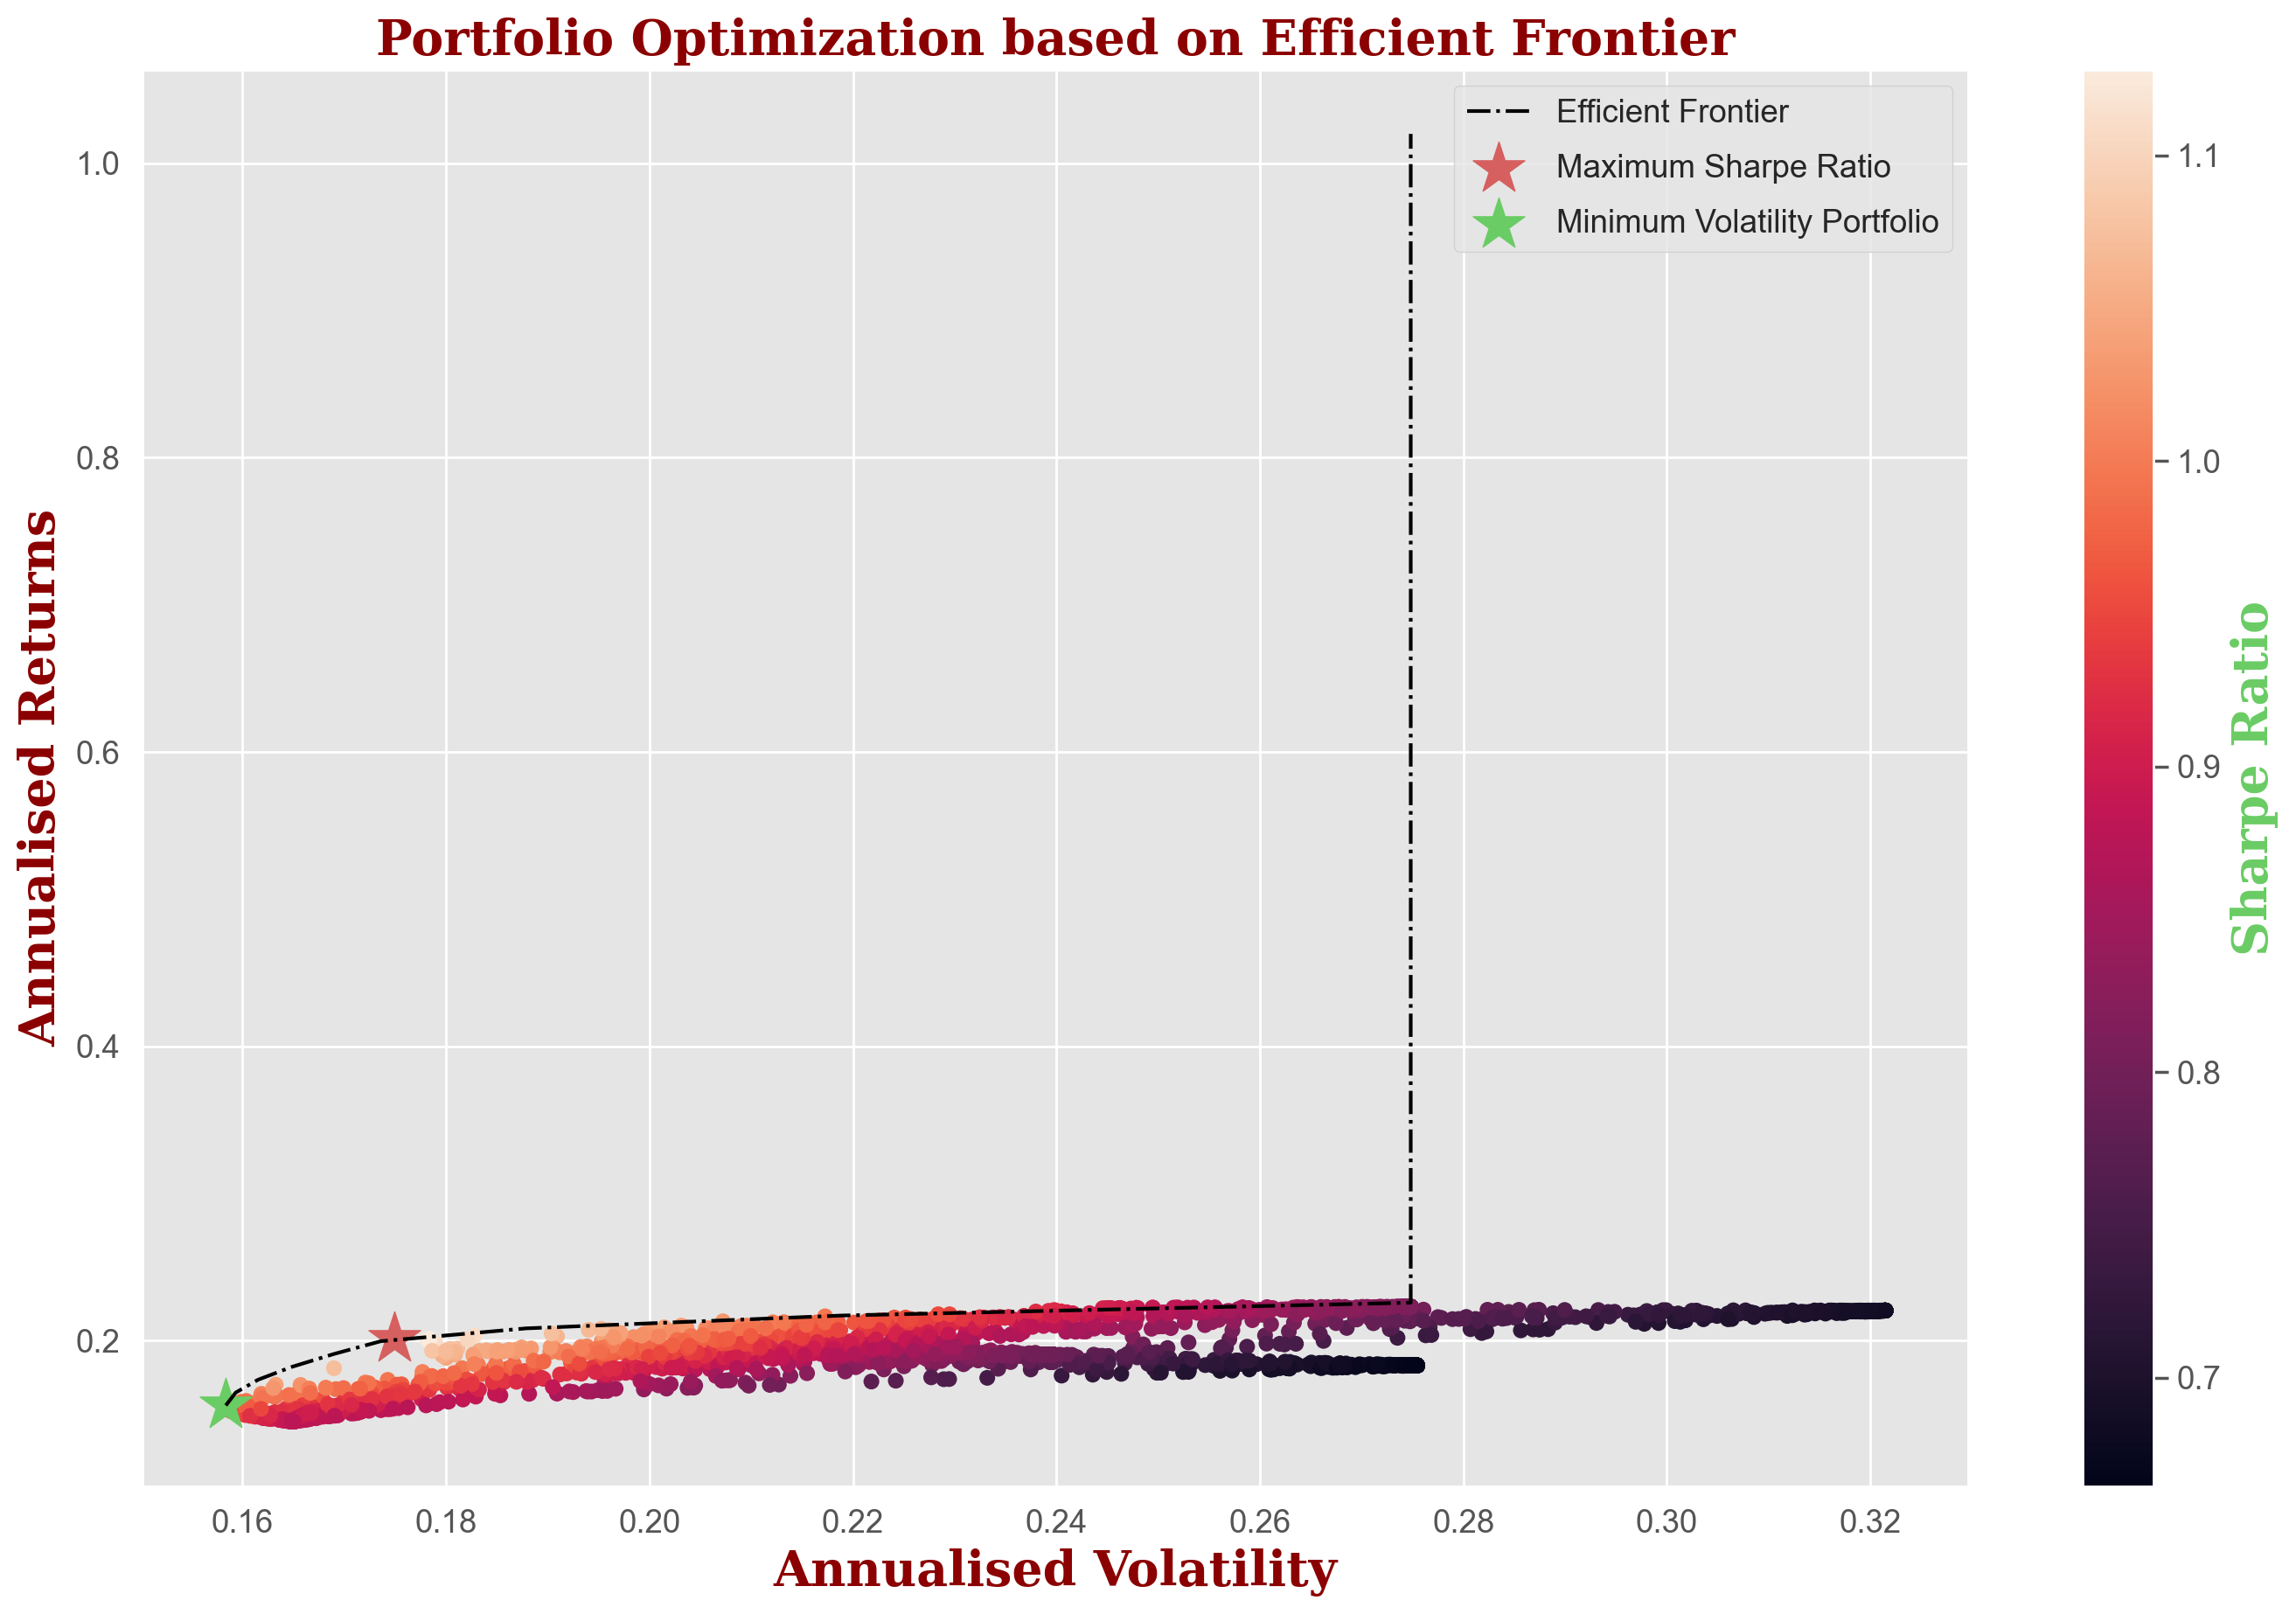

In [124]:
sharpe_maximum      = max_sharpe_ratio()
return_p,vol_p      = portfolio_performance(sharpe_maximum['x'])
min_volatility      = min_vol()
return_min,vol_min  = portfolio_performance(min_volatility['x'])


plt.figure(figsize =(15,10))
plt.style.use('ggplot')
plt.scatter(expected_vol,expected_returns, c = sharpe_ratio)
# plt.colorbar.sel(label = 'Sharpe Ratio',size=20)
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target               = np.linspace(return_min,1.02,100)
efficient_portfolios = efficient_frontier(target)
plt.plot([i.fun for i in efficient_portfolios], target, linestyle ='dashdot', color ='black',
         label='Efficient Frontier')
plt.scatter(vol_p,return_p, c = 'r', marker='*', s = 500, label = 'Maximum Sharpe Ratio')
plt.scatter(vol_min,return_min, c = 'g',  marker ='*', s = 500, label='Minimum Volatility Portfolio')

font1 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
font2 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
plt.title('Portfolio Optimization based on Efficient Frontier',fontdict=font1)
plt.xlabel('Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
plt.legend(labelspacing=0.8)

## Random portfolio simulation

Now we will move on to the crucial step of portfolio optimization: simulating a random portfolio using a Dirichlet distribution with weight limits. So we will try to generate 10,000 portfolios with a risk-free rate of $2.5\%$. To do this, we need to compute performance measures for each portfolio, such as the weighted average return during the year and the standard deviation and Sharpe ratio of each portfolio.

### Basic formulas for calculating the necessary functions

In [125]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):# portfolio performance, calculate the annualised return, sharpe ratio
    portfolio_return = np.sum(mean_returns*weights)*252 #252 working days at the stock exchange
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))*np.sqrt(252) # np.dot multiplication of matrices
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf): # random simulation
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights=np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
    return results_df


In [126]:
tickers = []
for i in dataset[['RIL','TCS','HDFCBK','ICICIBK','INFY', 'NIFTY']].columns:
    tickers.append(i)
tickers    

['RIL', 'TCS', 'HDFCBK', 'ICICIBK', 'INFY', 'NIFTY']

In [127]:
mean_returns = dataset[['RIL','TCS','HDFCBK','ICICIBK','INFY', 'NIFTY']].pct_change().mean()
cov = dataset[['RIL','TCS','HDFCBK','ICICIBK','INFY', 'NIFTY']].pct_change().cov()
num_portfolios = 10000
rf = 0.025
results_frame =simulate_random_portfolios(num_portfolios, mean_returns,cov, rf) #random selection/creation of the portfolio
results_frame

ret     stdev    sharpe       RIL       TCS    HDFCBK   ICICIBK  \
0     0.196370  0.179591  0.954222  0.083398  0.158865  0.306811  0.153506   
1     0.198284  0.182088  0.951653  0.312566  0.061505  0.321390  0.057584   
2     0.196654  0.178541  0.961427  0.157796  0.091249  0.351597  0.111354   
3     0.198659  0.179524  0.967330  0.248969  0.163840  0.295797  0.127869   
4     0.186012  0.168164  0.957469  0.195979  0.175274  0.206984  0.019538   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.201547  0.191129  0.923705  0.154673  0.038104  0.242768  0.263818   
9996  0.196245  0.187830  0.911705  0.077138  0.191716  0.105586  0.248896   
9997  0.178427  0.171943  0.892313  0.001116  0.347761  0.157633  0.023956   
9998  0.189420  0.172979  0.950522  0.195537  0.138931  0.165830  0.116228   
9999  0.190673  0.174223  0.950925  0.260336  0.165442  0.153937  0.091084   

          INFY     NIFTY  
0     0.278471  0.018949  
1     0.145739  0.101216  
2     0.237942  0.050062  
3     0.059026  0.104499  
4     0.154336  0.247889  
...        ...       ...  
9995  0.278794  0.021843  
9996  0.327447  0.049216  
9997  0.205949  0.263586  
9998  0.151247  0.232228  
9999  0.085479  0.243721  

[10000 rows x 9 columns]

In [128]:
results_frame.sum(axis=1)-results_frame["ret"]-results_frame["stdev"]-results_frame["sharpe"];

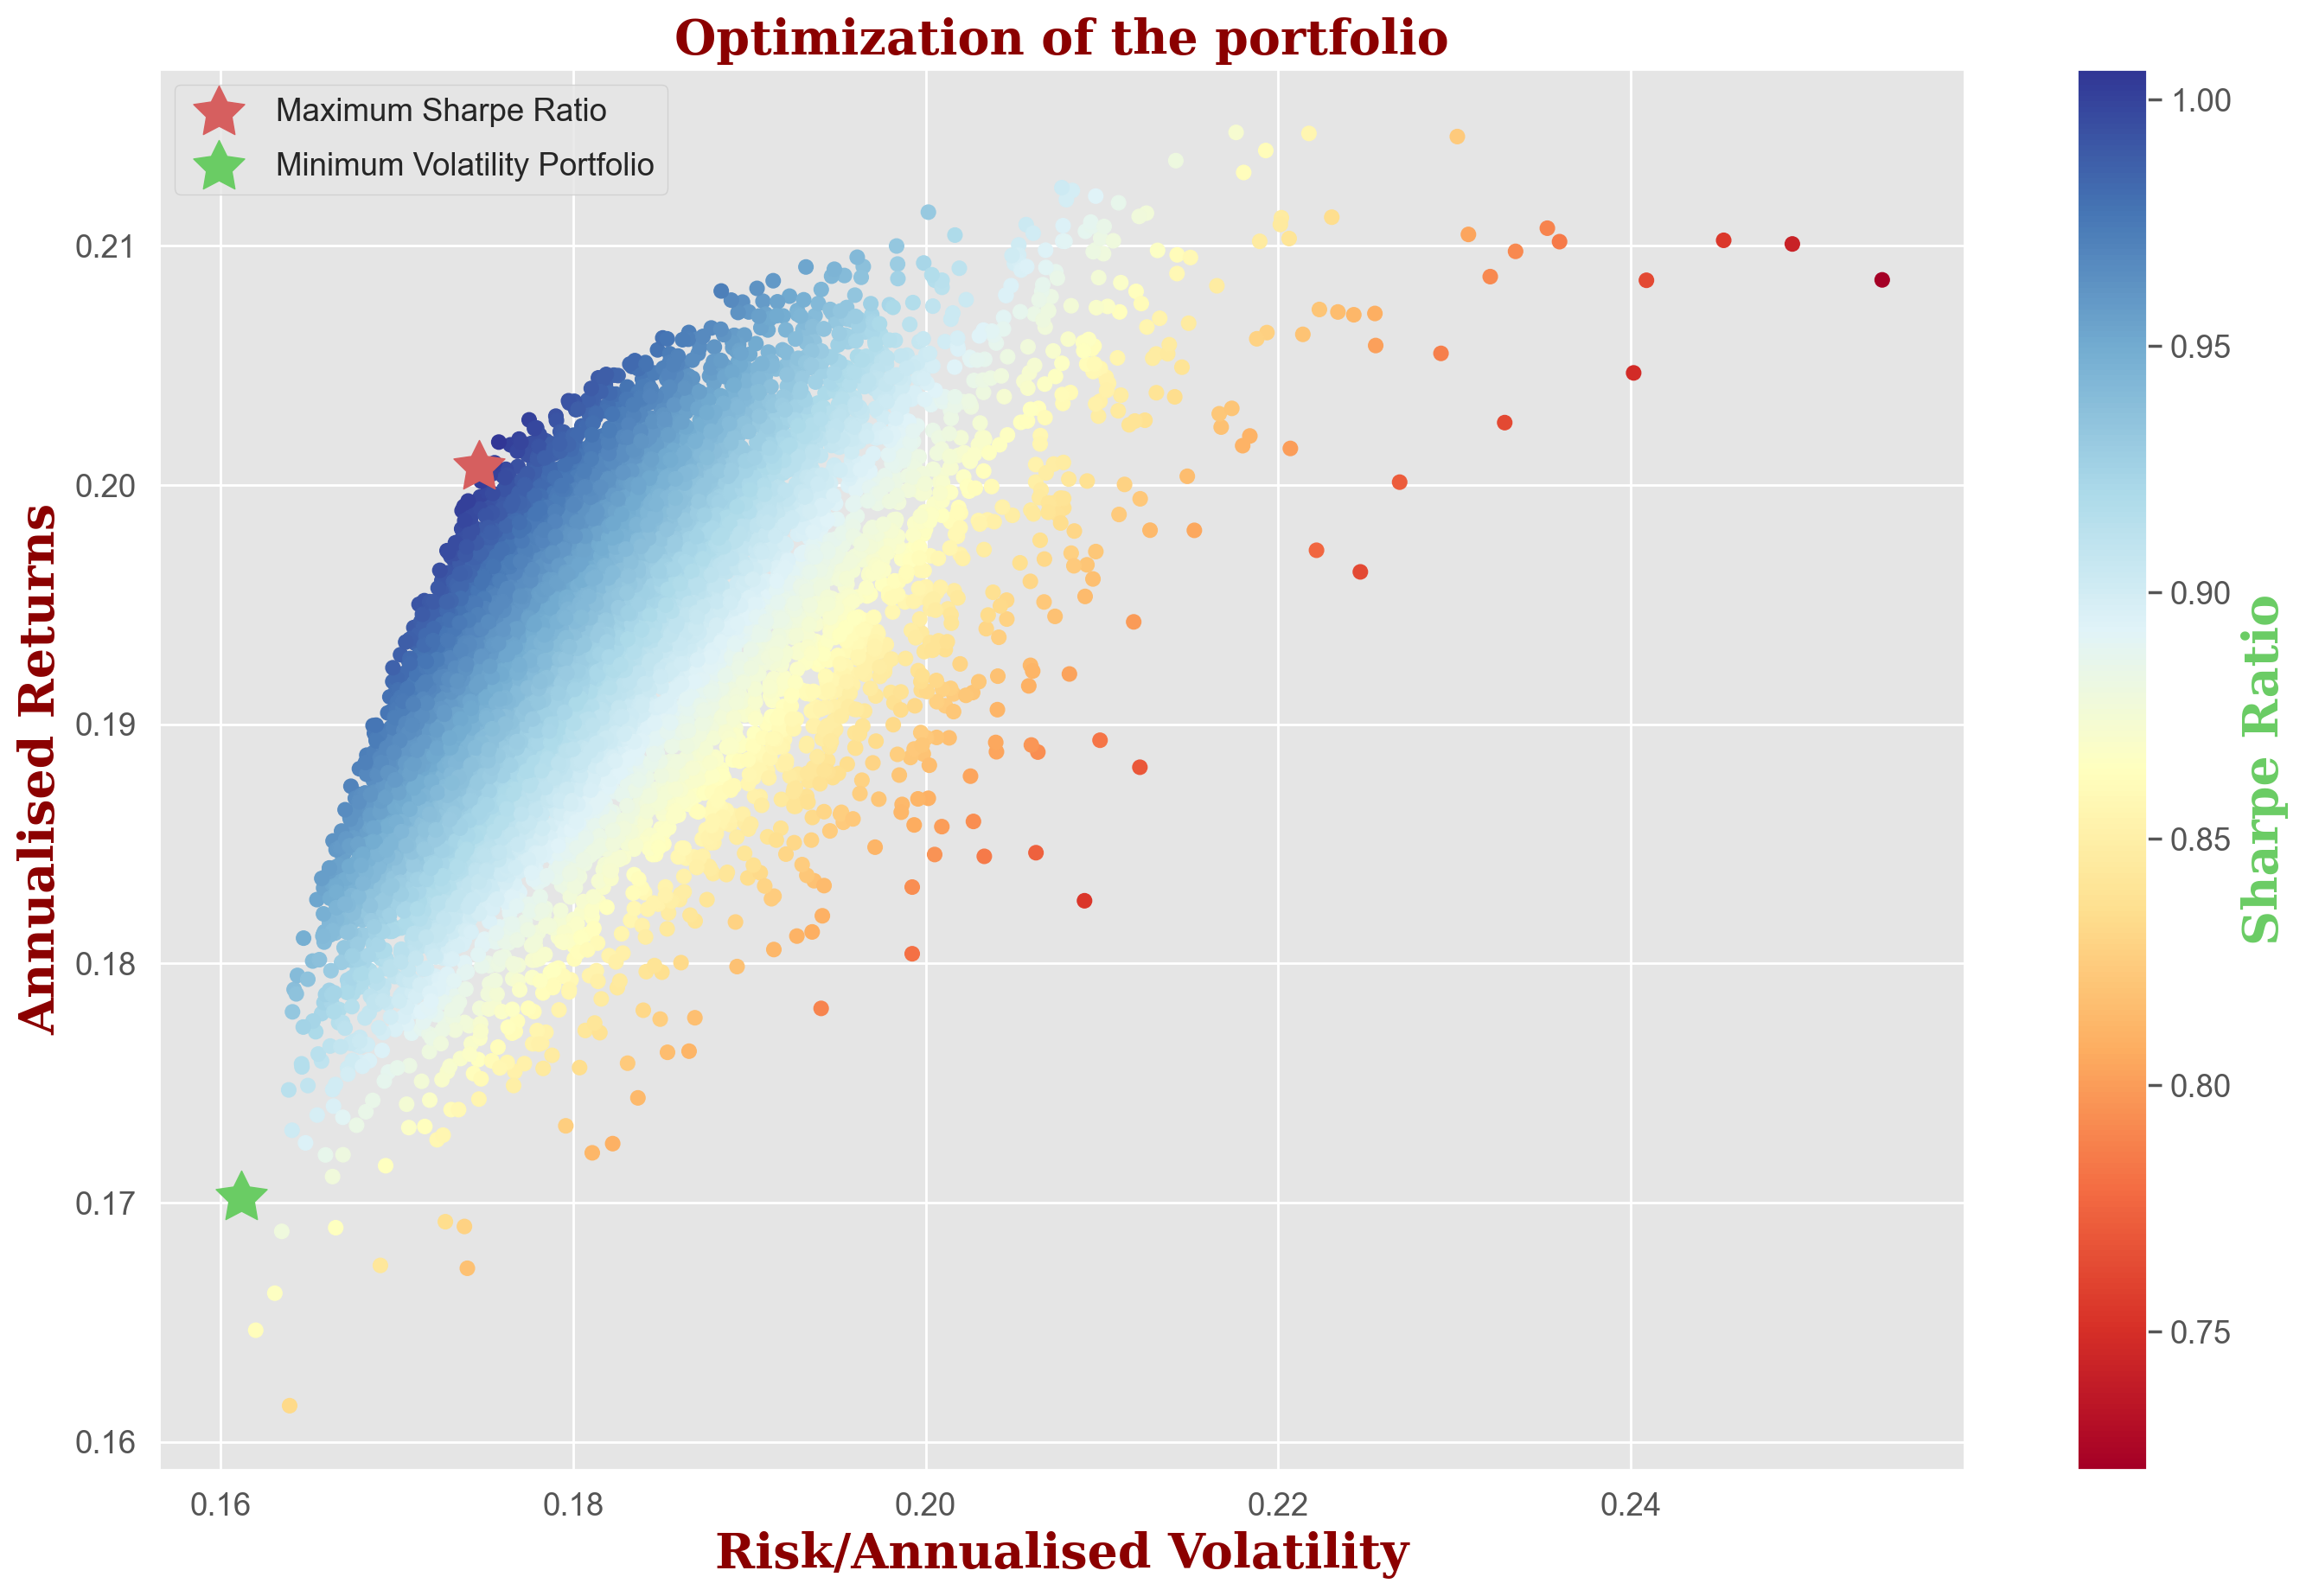

In [129]:
#Locate position of portfolio with highest Sharpe Ratio
max_sharpe_port=results_frame.iloc[results_frame["sharpe"].idxmax()] # max sharp ratio rouge
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame["stdev"].idxmin()] # min volatility = min variance portfolio vert
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10)) # Number of rows/colums of the subplot grid
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu') #Colormaps in Matplotlib
plt.title('Optimization of the portfolio',fontdict=font1)
plt.xlabel('Risk/Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
#plt.colorbar () # match the colorbar
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target               = np.linspace(return_min,1.02,100)
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500, label = 'Maximum Sharpe Ratio')
#plot green star to highlight position of minimum vartance portfolio
plt.scatter(min_vol_port[1] ,min_vol_port[0],marker=(5,1,0),color='g', s=500, label='Minimum Volatility Portfolio')
plt.legend(labelspacing=0.8)
plt.savefig('Portfolio_Optimization_Efficient_Frontier.pdf')
plt.show()

In [130]:
max_sharpe_port.to_frame().T # portfolio with the highest Sharpe ratio. it is negative when the investment return is Lower

ret     stdev    sharpe       RIL      TCS    HDFCBK   ICICIBK  \
7310  0.200762  0.174664  1.006284  0.248315  0.29404  0.290336  0.059469   

        INFY     NIFTY  
7310  0.1033  0.004541

In [131]:
min_vol_port.to_frame().T #portfolio with the Lowest variance portfolio

ret     stdev    sharpe       RIL       TCS    HDFCBK   ICICIBK  \
1308  0.170223  0.161155  0.901139  0.079331  0.195616  0.115669  0.013778   

          INFY     NIFTY  
1308  0.087373  0.508233

> Looking at the table of weights in a portfolio with the highest Sharpe ratio, we can see that TCS has a higher weight than the other companies. In comparison, ICICI bank has a lower weight in a minimum variance portfolio. We can conclude that the better portfolio among these two weights is the one with high risk. If we consider the risk-adjusted return, this portfolio gave the highest Sharpe ratio ($1.00\%$) compared to the minimum variance portfolio, which means that it is the one for which the investor will receive the highest excess return for the additional risk he will take.

## Conclusion

> In conclusion, the analysis of the stock market data for companies such as Reliance, TCS, HDFC bank, ICICI bank, Infosys and NIFTY50 has provided valuable insights.

* **Volatility**: The examination of annual and monthly volatilities revealed that ICICIBK exhibited the highest volatility among the stocks, indicating greater price fluctuations and potential risk. This information can assist investors in understanding the risk profiles of these stocks and making informed investment decisions.

* **Correlation**: The correlation analysis indicated strong positive correlations between the NIFTY50 and Other stocks. These correlations suggest potential interdependencies and can guide portfolio diversification strategies.

* **Risk-Adjusted Returns**: The evaluation of the Sharpe ratios offered insights into the risk-adjusted performance of the stocks. HDFC bank emerged as the stock with the highest Sharpe ratio, indicating the potential for generating better risk-adjusted returns compared to the other stocks and the risk-free investment.

> Overall, these findings highlight the importance of considering factors such as volatility, correlation, and risk-adjusted returns when analyzing and selecting stocks for investment purposes. By taking into account these key metrics, investors can make more informed decisions, manage risk effectively, and potentially optimize their investment portfolios.

# References

- [Volatilité et Ratio de Sharpe d'une action | Python for Finance](https://youtu.be/RrsJUaAWdEs)

- [Présentation projet analyse des données financières - Nour Mzoughi - Gestion des portefeuilles MEDAF](https://www.youtube.com/watch?v=73boS4j4zss&list=TLPQMDMwMzIwMjNZlMI_TgJCWA&index=1)

- [How Volatility Affects a Stock’s Return: Tested with Python](https://medium.com/analytics-vidhya/how-volatility-affects-a-stocks-return-tested-with-python-cdf7470d3808)
- [Beta of a Stock & CAPM from Scratch](https://www.kaggle.com/code/bhavinmoriya/beta-of-a-stock-capm-from-scratch)

- [Use Python to calculate the Sharpe ratio for a portfolio](https://towardsdatascience.com/calculating-sharpe-ratio-with-python-755dcb346805)
- [How to Calculate Sharpe Ratio with Pandas and NumPy](https://www.learnpythonwithrune.org/how-to-calculate-sharpe-ratio-with-pandas-and-numpy/)
- [Portfolio Management using Python — Portfolio Optimization](https://pub.towardsai.net/portfolio-management-using-python-portfolio-optimization-8a90dd2a21d)
- [Volatility And Measures Of Risk-Adjusted Return With Python](https://blog.quantinsti.com/volatility-and-measures-of-risk-adjusted-return-based-on-volatility/)
- [Python for Finance: Risk and Return](https://www.learnpythonwithrune.org/python-for-finance-risk-and-return/)

- [Portfolio Optimization with Python using Efficient Frontier with Practical Examples](https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/)

- [Efficient Frontier in Python — Detailed Tutorial](https://towardsdatascience.com/efficient-frontier-in-python-detailed-tutorial-84a304f03e79)

- [Portfolio Optimization using MPT in Python](https://www.analyticsvidhya.com/blog/2021/04/portfolio-optimization-using-mpt-in-python/)

- [The Efficient Frontier-Markowitz portfolio optimization in Python](https://github.com/aghanhussain/Markowitz-Portfolio-Optimization-with-Python/blob/master/The%20Efficient%20Frontier-Markowitz%20portfolio%20optimization%20in%20Python.ipynb)

- [Simulating Thousands of Random Portfolios to Illustrate the Efficient Frontier using Python](https://www.interviewqs.com/blog/efficient-frontier)

- [How to simulate financial portfolios with Python](https://towardsdatascience.com/how-to-simulate-financial-portfolios-with-python-d0dc4b52a278)

- [Portfolio simulation & efficient frontier(MPT) using Python](https://medium.com/@akjha22/portfolio-simulation-efficient-frontier-mpt-using-python-1ab99dd47efb)
